In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import itertools
import re
# from ggplot import *
from scipy import stats
from scipy.stats import pearsonr

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [ ]:
#FIXED SMALL ERRORS IN CORT VALUES FROM ORIGINAL CSV -- 7/17/17
##nomom = pd.read_csv('NOMOM_all_info_2016_scatterize.csv')
#nomom = pd.read_csv('NOMOM_all_info_2016_scatterize_71717.csv')


In [ ]:
##Transform behavior (log and sqrt)
# def my_function_to_log(data):
#     data = data.copy()
#     for EachBehavior in nomom.filter(regex="-pet$|-hip$").columns:
#         newCol = EachBehavior+'_trans'
#         behavior=EachBehavior.split("-")[0]
#         #print(behavior)
#         if behavior in ('ALLVOC', 'VV', 'BA', 'GI', 'SH'):
#             #print("Square root")
#             data[newCol] = np.sqrt(data[EachBehavior]);
#         else:
#             #print("Log")
#             data[newCol] = np.log(data[EachBehavior]+1);
#             #break
#     return data
    
# nomom_new = my_function_to_log(nomom)
# nomom_new.columns = [re.sub( '[+]', '', names) for names in nomom_new.columns]

# #Average HIP behaviors across time chunks
# behavior = [string.split("-")[0] for string in nomom_new.filter(regex="hip_trans$").columns]
# conditions =['A', 'NEC', 'ST']

# for eachBehavior in behavior:
#     for eachCond in conditions:
#         selected_columns = nomom_new.filter(regex=eachBehavior+"-"+eachCond+"[1-6]-hip_trans$").columns
#         if len(selected_columns) > 0:
#             new_column_name=eachBehavior+"-"+eachCond+"all-hip_trans"
#             nomom_new[new_column_name]=nomom_new[selected_columns].mean(axis=1)
#             #print(nomom_new[selected_columns])
#             #print(nomom_new[new_column_name])


# #Average PET behaviors across time chunks
# behavior = [string.split("-")[0] for string in nomom_new.filter(regex="pet_trans$").columns]
# conditions =['NEC']

# for eachBehavior in behavior:
#     for eachCond in conditions:
#         selected_columns = nomom_new.filter(regex=eachBehavior+"-"+eachCond+"[1-6]-pet_trans$").columns
#         if len(selected_columns) > 0:
#             new_column_name=eachBehavior+"_"+eachCond+"all-pet_trans"
#             nomom_new[new_column_name]=nomom_new[selected_columns].mean(axis=1)
# #            print(nomom_new[selected_columns])
# #            print(nomom_new[new_column_name])
# #            break
# #    break

# #Save data to csv
# nomom_new.to_csv('NOMOM_all_info_transformed_python_81717.csv')
# #Remove odd symbols
# old_cols = nomom_new.columns
# nomom_new.columns = [re.sub( '[/\(\)#%\' \.+]', '', names).replace('-','_') for names in nomom_new.columns]




In [2]:
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##MORE NEW LOADS BELOW
# csvfile = 'NOMOM_all_info_scatterize.csv'
# nomom = pd.read_csv(csvfile, index_col=0, na_values=['NA'])
#After residualising hormones, calculating AT_NEW in RStudio and adding DTI cluster data
nomom = pd.read_csv('NOMOM_ALL_data_scatterize_hormones.csv', index_col=0, na_values=['NA'])

##Remove odd symbols
old_cols = nomom.columns
nomom.columns = [re.sub( '[/\(\)#%\' \+]', '', names).replace('-','_').replace('.','_').replace('__','_') for names in nomom.columns]

In [96]:
##Read header
#nomom.columns
#[print(name) for name in nomom.columns]
#print(nomom.filter(regex="_L_").columns)
#nomom.head()

##List comprehension
#[print(name) for name in nomom.columns]
#[print(name) for name in nomom.filter(regex="-pet$").columns]

##Select all columns ending in pet or hip
#behaviors=nomom.filter(regex="-pet$|-hip$").columns
#[print(name) for name in behaviors]
##Cut string
#behavior_string=[string.split("-")[0] for string in behaviors]
#[print(name) for name in behavior_string]
#behavior = [string.split("-")[0] for string in nomom_new.filter(regex="hip_trans$").columns]
#print(nomom_new.filter(regex="hip_trans$").columns)
#print(nomom_new.filter(regex="FD"+"-"+"NEC"+"[1-6]-hip_trans$").columns)

#print(nomom_new.filter(regex="uPET").columns)
print(nomom.filter(regex="X_Days_G").columns)
#print(nomom.filter(regex="AT").columns)

Index([], dtype='object')


In [8]:
#Average hemispheres of structures
regions = [string.split("_")[0] for string in nomom.filter(regex="_L_ad").columns]
scalars =['ad','fa','rd','tr']

for eachRegion in regions:
    for eachScalar in scalars:
        #print ("region: "+eachRegion)
        #print ("scalar: "+eachScalar)
        selected_columns = nomom.filter(regex=eachRegion+"_[LR]_"+eachScalar).columns
        #print ("columns: "+selected_columns)
        if len(selected_columns) > 0:
            new_column_name=eachRegion+"_av_"+eachScalar
            nomom[new_column_name]=nomom[selected_columns].mean(axis=1)
print(nomom.filter(regex="_av_").columns)

Index(['CING_av_ad', 'CING_av_fa', 'CING_av_rd', 'CING_av_tr', 'IC_av_ad',
       'IC_av_fa', 'IC_av_rd', 'IC_av_tr', 'IFO_av_ad', 'IFO_av_fa',
       'IFO_av_rd', 'IFO_av_tr', 'STRIA_av_ad', 'STRIA_av_fa', 'STRIA_av_rd',
       'STRIA_av_tr', 'UNC_av_ad', 'UNC_av_fa', 'UNC_av_rd', 'UNC_av_tr'],
      dtype='object')


In [11]:
#OLS/RLM
#Example
#print (smf.ols('STRIA_av_fa ~ GroupC+SexC+MRI_age_Yr_', data=nomom).fit().summary())
#print (smf.rlm('IC_av_ad ~ GroupC+SexC+MRI_age_Yr_', data=nomom).fit().summary())

print (smf.rlm('UNC_av_fa ~ SexC+MRI_age_Yr_', data=nomom).fit().summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              UNC_av_fa   No. Observations:                   50
Model:                            RLM   Df Residuals:                       47
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 16 May 2018                                         
Time:                        11:37:10                                         
No. Iterations:                    15                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2594      0.007     36.413      

In [207]:
#Loop to export Region & Scalar to stats table
results_list = []
selected_columns = ['CC_fa','CING_av_fa', 'IC_av_fa', 'IFO_av_fa','STRIA_av_fa', 'UNC_av_fa', 
                    'CC_tr','CING_av_tr', 'IC_av_tr', 'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr',
                    'CC_ad','CING_av_ad', 'IC_av_ad','IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 
                    'CC_rd','CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 'STRIA_av_rd','UNC_av_rd']
for col in (selected_columns):
    #print (col)
    try:
        results = smf.rlm(col+' ~ GroupC+SexC+MRI_age_Yr_+uPET_wt_kg_', data=nomom).fit()
        #results_list.append(pd.DataFrame( [results.tvalues[1],results.pvalues[1]], index=['t','p']).transpose()) 
        #results_list.append(pd.DataFrame( [str("%.2f" % round(results.tvalues[1],2)),str("%.3f" % round(results.pvalues[1],3))], index=['t','p']).transpose()) 
        results_list.append(pd.DataFrame( [str("%.3f" % round(results.pvalues[1],3))], index=['p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [0.0,1.0], index=['t','p']).transpose()) 
        results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.ix[nomom["NR"]==1][selected_columns].mean().values
results_df['mean_MR']=nomom.ix[nomom["NR"]==0][selected_columns].mean().values
results_df['std_NR']=nomom.ix[nomom["NR"]==1][selected_columns].std().values
results_df['std_MR']=nomom.ix[nomom["NR"]==0][selected_columns].std().values
results_df['descr_NR']=[str("%.3f" % round(d.values[0],3))+" ("+str("%.3f" % round(d.values[1],3))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.3f" % round(d.values[0],3))+" ("+str("%.3f" % round(d.values[1],3))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns
results_df_clean = results_df[['descr_MR','descr_NR','p']]
results_df_clean.ix[ results_df_clean['p']=='0.000', 'p' ] = '<0.001'
print (results_df_clean)


/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                  descr_MR       descr_NR      p
CC_fa        0.427 (0.020)  0.426 (0.020)  0.280
CING_av_fa   0.300 (0.016)  0.293 (0.016)  0.205
IC_av_fa     0.414 (0.018)  0.423 (0.016)  0.066
IFO_av_fa    0.386 (0.019)  0.386 (0.013)  0.866
STRIA_av_fa  0.247 (0.010)  0.241 (0.014)  0.099
UNC_av_fa    0.275 (0.011)  0.278 (0.010)  0.050
CC_tr        0.780 (0.029)  0.784 (0.025)  0.549
CING_av_tr   0.734 (0.026)  0.735 (0.013)  0.235
IC_av_tr     0.703 (0.027)  0.715 (0.023)  0.088
IFO_av_tr    0.778 (0.019)  0.779 (0.013)  0.868
STRIA_av_tr  0.900 (0.036)  0.887 (0.044)  0.396
UNC_av_tr    0.773 (0.038)  0.764 (0.009)  0.747
CC_ad        1.191 (0.036)  1.199 (0.030)  0.417
CING_av_ad   0.974 (0.031)  0.969 (0.020)  0.870
IC_av_ad     1.056 (0.032)  1.080 (0.034)  0.038
IFO_av_ad    1.136 (0.030)  1.140 (0.026)  0.386
STRIA_av_ad  1.149 (0.044)  1.126 (0.061)  0.298
UNC_av_ad    1.006 (0.043)  0.998 (0.015)  0.598
CC_rd        0.574 (0.030)  0.577 (0.029)  0.601
CING_av_rd   0.614 (

/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
#Center time of day
nomom['nec_Time_C'] = nomom.uPET_Cort_Draw_Time.subtract(nomom.uPET_Cort_Draw_Time.mean())
nomom['hip_Time_C'] = nomom.HIP_Cort_Time.subtract(nomom.HIP_Cort_Time.mean())
nomom['bld_Time_C'] = nomom.Bld_wCSF_Draw_Time.subtract(nomom.Bld_wCSF_Draw_Time.mean())
nomom['csf_Time_C'] = nomom.CSF_Draw_Time.subtract(nomom.CSF_Draw_Time.mean())

print(nomom.filter(regex="Time_C").columns)
print(nomom.filter(regex="Cort").columns)


Index(['nec_Time_C', 'hip_Time_C', 'bld_Time_C', 'csf_Time_C'], dtype='object')
Index(['uPET_Cort_ug_dL_', 'uPET_Cort_Draw_Time', 'HIP_Cort_ug_dL_',
       'HIP_Cort_Time', 'Bld_wCSF_Cort_ug_dL_', 'uPET_Cort_z_resid',
       'uPET_Cort_z', 'HIP_Cort_z_resid', 'Bld_wCSF_Cort_z_resid'],
      dtype='object')


In [8]:
#print(nomom.Bld_wCSF_Draw_Time_C)
#print(nomom.Bld_wCSF_Oxytocin_pg_ml_)

#print(smf.ols('uPET_Cort_ug_dL_ ~ nec_Time_C', data=nomom).fit().summary())
coef=(smf.ols('Bld_wCSF_Cort_ug_dL_ ~ bld_Time_C', data=nomom).fit().params[1])
print(coef)
test = nomom.Bld_wCSF_Cort_ug_dL_ - (coef*nomom.bld_Time_C)
#print(nomom.Bld_wCSF_Cort_ug_dL_)
#print(test)

-81.8988570985


In [14]:
# uPET_Cort_ug_dL_
# uPET_Oxytocin_pg_ml_
## nec_Time_C

# HIP_Cort_ug_dL_
## hip_Time_C

# Bld_wCSF_Cort_ug_dL_
# Bld_wCSF_Oxytocin_pg_ml_
## bld_Time_C

# CSF_CRF
# CSF_oxytocin
## csf_Time_C

#NEC Cort
coef=(smf.ols('uPET_Cort_ug_dL_ ~ nec_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['cort_nec_resid'] = nomom.uPET_Cort_ug_dL_ - (coef*nomom.nec_Time_C)
#NEC Oxy
coef=(smf.ols('uPET_Oxytocin_pg_ml_ ~ nec_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['oxy_nec_resid'] = nomom.uPET_Oxytocin_pg_ml_ - (coef*nomom.nec_Time_C)
#HIP Cort
coef=(smf.ols('HIP_Cort_ug_dL_ ~ hip_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['cort_hip_resid'] = nomom.HIP_Cort_ug_dL_ - (coef*nomom.hip_Time_C)
#Bld Cort
coef=(smf.ols('Bld_wCSF_Cort_ug_dL_ ~ bld_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['cort_bld_resid'] = nomom.Bld_wCSF_Cort_ug_dL_ - (coef*nomom.bld_Time_C)
#Bld Oxy
coef=(smf.ols('Bld_wCSF_Oxytocin_pg_ml_ ~ bld_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['oxy_bld_resid'] = nomom.Bld_wCSF_Oxytocin_pg_ml_ - (coef*nomom.bld_Time_C)
#CSF CRF
coef=(smf.ols('CSF_CRF ~ csf_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['crf_csf_resid'] = nomom.CSF_CRF - (coef*nomom.csf_Time_C)
#CSF Oxy
coef=(smf.ols('CSF_oxytocin ~ csf_Time_C', data=nomom).fit().params[1])
print(coef)
nomom['oxy_csf_resid'] = nomom.CSF_oxytocin - (coef*nomom.csf_Time_C)

print(nomom.filter(regex="_resid").columns)

104.82007635
203.578195446
101.273519469
-81.8988570985
5981.503269
508.234533091
115.87
Index(['VV_NECall_pet_trans_z_resid', 'FF_NECall_pet_trans_z_resid',
       'uPET_Cort_z_resid', 'HIP_Cort_z_resid', 'Bld_wCSF_Cort_z_resid',
       'CSF_CRF_z_resid', 'cort_nec_resid', 'oxy_nec_resid', 'cort_hip_resid',
       'cort_bld_resid', 'oxy_bld_resid', 'crf_csf_resid', 'oxy_csf_resid'],
      dtype='object')


In [311]:
#Test if R and python do the same
# x=nomom['cort_nec_resid']
# y=nomom['C_NEC_res']


x=nomom['AT']
y=nomom['AT_NEW']
testnp = np.corrcoef(x, y)[0, 1]
testsp = stats.pearsonr(x, y)

from scipy.stats import linregress
testsp2 = linregress(x, y)

print (testnp)
print (testsp)
print (testsp2)

0.977488556589
(0.97748855658929268, 4.2949479616647714e-34)
LinregressResult(slope=0.94110413582179697, intercept=0.0010306117358346025, rvalue=0.97748855658929323, pvalue=4.2949479616622193e-34, stderr=0.029320005144424299)


In [5]:
#Endocrine hormone table for manuscript (OLD OXY value)
#Table CORT OXY CRH
results_list = []
selected_columns = ['cort_bld_resid', 'oxy_bld_resid', 'crf_csf_resid', 'Oxy_CSF_Rep1_resid','Oxy_CSF_Rep2_resid','oxy_csf_resid','Oxy_CSF_Mean_reps_resid','Oxy_CSF_Mean_reps_cv30_resid',
                   'cort_nec_resid', 'oxy_nec_resid', 'cort_hip_resid']
for col in (selected_columns):
    #print (col)
    try:
        results = smf.rlm(col+' ~ GroupC+SexC+MRI_age_Yr_', data=nomom).fit()
        #results_list.append(pd.DataFrame( [results.tvalues[1],results.pvalues[1]], index=['t','p']).transpose()) 
        results_list.append(pd.DataFrame( [str("%.2f" % round(results.tvalues[1],2)),str("%.3f" % round(results.pvalues[1],3))], index=['t','p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [0.0,1.0], index=['t','p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.loc[nomom["NR"]==1][selected_columns].mean().values
results_df['mean_MR']=nomom.loc[nomom["NR"]==0][selected_columns].mean().values
results_df['std_NR']=nomom.loc[nomom["NR"]==1][selected_columns].std().values
results_df['std_MR']=nomom.loc[nomom["NR"]==0][selected_columns].std().values
results_df['descr_NR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns
results_df_clean = results_df[['descr_MR','descr_NR','t','p']]
results_df_clean.loc[ results_df_clean['p']=='0.000', 'p' ] = '<0.001'
print (results_df_clean)

results_df_clean.to_csv('Endocrines_table.csv')

                                     descr_MR         descr_NR      t       p
cort_bld_resid                   32.84 (9.26)     33.65 (9.84)   0.12   0.901
oxy_bld_resid                 305.22 (289.05)  367.40 (421.13)  -0.39   0.697
crf_csf_resid                   37.35 (17.73)    38.78 (15.06)  -0.50   0.615
Oxy_CSF_Rep1_resid               19.44 (7.68)     13.54 (9.68)   2.83   0.005
Oxy_CSF_Rep2_resid              23.33 (14.71)    16.69 (10.21)   1.91   0.057
oxy_csf_resid                    21.51 (9.55)     15.29 (9.48)   2.36   0.018
Oxy_CSF_Mean_reps_resid         21.79 (10.07)     15.62 (9.57)   2.34   0.019
Oxy_CSF_Mean_reps_cv30_resid     20.44 (5.71)     16.35 (7.59)   4.04  <0.001
cort_nec_resid                   67.13 (9.75)    68.05 (14.62)   0.09   0.928
oxy_nec_resid                 376.90 (414.71)  321.29 (309.83)   0.26   0.796
cort_hip_resid                  62.20 (10.55)    62.41 (11.52)  -0.20   0.839


/Users/DOT/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-5-2e759ff793f9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_clean.loc[ results_df_clean['p']=='0.000', 'p' ] = '<0.001'


In [11]:
print (nomom.filter(regex="all_pet_trans$").columns)
print (nomom.filter(regex="NR").columns)
print (nomom.filter(regex="Male").columns)
print (nomom.filter(regex="uPET_age_Yr").columns)


Index(['ALLVOC_NECall_pet_trans', 'ALLOC_NECall_pet_trans',
       'ALLEXP_NECall_pet_trans', 'VV_NECall_pet_trans', 'BA_NECall_pet_trans',
       'GI_NECall_pet_trans', 'VO_NECall_pet_trans', 'LO_NECall_pet_trans',
       'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans',
       'EN_NECall_pet_trans', 'SD_NECall_pet_trans', 'RE_NECall_pet_trans',
       'LY_NECall_pet_trans', 'HU_NECall_pet_trans', 'TG_NECall_pet_trans',
       'LS_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans'],
      dtype='object')
Index(['NR'], dtype='object')
Index(['Male'], dtype='object')
Index(['uPET_age_Yr_'], dtype='object')


In [229]:
# print(smf.rlm('FF_NECall_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_Aall_hip_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('AT_NEW ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())


# print(smf.rlm('FF_NEC1_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_NEC2_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_NEC3_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_NEC4_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_NEC5_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('FF_NEC6_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())

In [19]:
#Loop to export PET-NEC stats table
results_list = []
selected_columns_pet = nomom.filter(regex="all_pet_trans$|AT$|AT_NEW").columns
for col in (selected_columns_pet):
#     print (col)
    try:
        results = smf.rlm(col+' ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit()
        #results_list.append(pd.DataFrame( [results.tvalues[1],results.pvalues[1]], index=['t','p']).transpose()) 
        results_list.append(pd.DataFrame( [str("%.2f" % round(results.tvalues[1],2)),str("%.3f" % round(results.pvalues[1],3))], index=['t','p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [0.0,1.0], index=['t','p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.ix[nomom["NR"]==1][selected_columns_pet].mean().values
results_df['mean_MR']=nomom.ix[nomom["NR"]==0][selected_columns_pet].mean().values
results_df['std_NR']=nomom.ix[nomom["NR"]==1][selected_columns_pet].std().values
results_df['std_MR']=nomom.ix[nomom["NR"]==0][selected_columns_pet].std().values
results_df['descr_NR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns_pet
results_df_clean_pet = results_df[['descr_MR','descr_NR','t','p']]
results_df_clean_pet.ix[ results_df_clean_pet['p']=='0.000', 'p' ] = '<0.001'
print (results_df_clean_pet)





                            descr_MR      descr_NR      t       p
AT                       0.13 (0.58)  -0.13 (0.85)  -1.20   0.229
ALLVOC_NECall_pet_trans  1.91 (2.83)   2.98 (4.06)   1.09   0.277
ALLOC_NECall_pet_trans   3.48 (1.38)   3.97 (1.14)   1.54   0.123
ALLEXP_NECall_pet_trans  3.57 (0.64)   3.18 (0.61)  -2.19   0.029
VV_NECall_pet_trans      1.84 (2.78)   2.76 (4.04)   0.89   0.374
BA_NECall_pet_trans      0.13 (0.38)   0.33 (0.71)   1.86   0.062
GI_NECall_pet_trans      0.10 (0.28)   0.26 (0.49)   1.83   0.067
VO_NECall_pet_trans      0.04 (0.19)   0.09 (0.24)   3.07   0.002
LO_NECall_pet_trans      3.32 (1.23)   3.81 (1.08)   1.84   0.065
LOST_NECall_pet_trans    1.18 (1.63)   1.10 (1.37)   0.09   0.931
IN_NECall_pet_trans      4.93 (0.37)   4.39 (0.61)  -3.61  <0.001
FF_NECall_pet_trans      2.60 (1.67)   1.60 (1.64)  -2.28   0.022
EN_NECall_pet_trans      1.23 (0.81)   2.04 (1.01)   3.11   0.002
SD_NECall_pet_trans      0.70 (0.86)   2.57 (1.63)   4.93  <0.001
RE_NECall_

/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
#Rename rows and columns PET
rename_cols_dict = {'descr_NR':'Nursery Reared [mean (sd)]', 'descr_MR':'Control [mean (sd)]', 
                    't':'t value', 'p':'p value'}
rename_index_dict = {'ALLVOC_NECall_pet_trans':'All Vocalizations', 'VV_NECall_pet_trans':'   Coo Vocalizations','BA_NECall_pet_trans':'   Bark Vocalizations',
       'GI_NECall_pet_trans':'   Girn Vocalizations', 'ALLOC_NECall_pet_trans':'All Locomotion', 'LO_NECall_pet_trans':'   Locomotion', 'LOST_NECall_pet_trans':'   Stereo Locomotion',
       'ALLEXP_NECall_pet_trans':'All Experimenter Orient','EO_NECall_pet_trans':'   Experimenter Orient', 'EH_NECall_pet_trans':'   Experimenter Hostility',
       'IN_NECall_pet_trans':'   Inactivity', 'FF_NECall_pet_trans':'   Freezing', 'EN_NECall_pet_trans':'   Environmental Explore',
       'SD_NECall_pet_trans':'   Self-Directed', 'LY_NECall_pet_trans':'   Lying Down', 'HU_NECall_pet_trans':'   Huddle',
       'RE_NECall_pet_trans':'   Resting', 'TG_NECall_pet_trans':'   Teeth Grinding', 'LS_NECall_pet_trans':'   Lip Smack'}
results_df_rename_pet = results_df_clean_pet.rename(index=rename_index_dict, columns=rename_cols_dict)

results_df_rename_reorder_pet = results_df_rename_pet.reindex([ 'All Vocalizations','   Coo Vocalizations', '   Bark Vocalizations', '   Girn Vocalizations',
                                                               'All Locomotion', '   Locomotion', '   Stereo Locomotion',
                                                               'All Experimenter Orient','   Experimenter Orient','   Experimenter Hostility',
                                                               'All Other Behaviors','   Freezing','   Self-Directed','   Inactivity','   Environmental Explore', '   Lying Down', '   Huddle','   Resting', '   Teeth Grinding', '   Lip Smack', ])
print( results_df_rename_reorder_pet )
results_df_rename_reorder_pet.to_csv('PET_NEC_table.csv')



                          Control [mean (sd)] Nursery Reared [mean (sd)]  \
All Vocalizations                 1.91 (2.83)                2.98 (4.06)   
   Coo Vocalizations              1.84 (2.78)                2.76 (4.04)   
   Bark Vocalizations             0.13 (0.38)                0.33 (0.71)   
   Girn Vocalizations             0.10 (0.28)                0.26 (0.49)   
All Locomotion                    3.48 (1.38)                3.97 (1.14)   
   Locomotion                     3.32 (1.23)                3.81 (1.08)   
   Stereo Locomotion              1.18 (1.63)                1.10 (1.37)   
All Experimenter Orient           3.57 (0.64)                3.18 (0.61)   
   Experimenter Orient            3.54 (0.65)                3.14 (0.64)   
   Experimenter Hostility         0.28 (0.43)                0.27 (0.40)   
All Other Behaviors                       NaN                        NaN   
   Freezing                       2.60 (1.67)                1.60 (1.64)   
   Self-Dire

In [23]:
#Loop to export HIP stats table
results_list = []
selected_columns = nomom.filter(regex="all_hip_trans$").columns
for col in (selected_columns):
#     print (col)
    try:
        results = smf.rlm(col+' ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit()
        #results_list.append(pd.DataFrame( [results.tvalues[1],results.pvalues[1]], index=['t','p']).transpose()) 
        results_list.append(pd.DataFrame( [str("%.2f" % round(results.tvalues[1],2)),str("%.3f" % round(results.pvalues[1],3))], index=['t','p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [0.0,1.0], index=['t','p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.ix[nomom["NR"]==1][selected_columns].mean().values
results_df['mean_MR']=nomom.ix[nomom["NR"]==0][selected_columns].mean().values
results_df['std_NR']=nomom.ix[nomom["NR"]==1][selected_columns].std().values
results_df['std_MR']=nomom.ix[nomom["NR"]==0][selected_columns].std().values
results_df['descr_NR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns
results_df_clean = results_df[['descr_MR','descr_NR','t','p']]
results_df_clean.ix[ results_df_clean['p']=='0.000', 'p' ] = '<0.001'
print (results_df_clean)

                            descr_MR     descr_NR      t       p
ALLVOC_Aall_hip_trans    1.34 (2.00)  1.97 (3.05)   0.60   0.551
ALLVOC_NECall_hip_trans  1.55 (2.89)  2.08 (3.22)   0.79   0.431
ALLVOC_STall_hip_trans   3.37 (2.64)  4.79 (3.79)   1.54   0.123
ALLOC_Aall_hip_trans     3.93 (1.22)  4.79 (0.71)   2.81   0.005
ALLOC_NECall_hip_trans   2.40 (1.77)  3.16 (1.92)   1.51   0.132
ALLOC_STall_hip_trans    3.37 (1.28)  3.82 (1.28)   1.75   0.080
ALLEXP_NECall_hip_trans  4.10 (0.55)  3.70 (0.60)  -2.82   0.005
ALLEXP_STall_hip_trans   4.40 (0.54)  4.28 (0.60)  -1.01   0.313
VV_Aall_hip_trans        1.22 (1.93)  1.80 (3.03)   0.42   0.677
VV_NECall_hip_trans      1.46 (2.70)  1.91 (3.17)   0.44   0.657
VV_STall_hip_trans       2.07 (2.04)  2.98 (3.48)   0.92   0.356
BA_Aall_hip_trans        0.19 (0.61)  0.19 (0.40)   1.32   0.187
BA_NECall_hip_trans      0.32 (1.03)  0.21 (0.59)   0.65   0.515
BA_STall_hip_trans       1.85 (2.20)  2.66 (2.52)   1.25   0.210
GI_Aall_hip_trans        

/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
#Make new pivot column for condition HIP
#HIP
results_df_clean['Condition']=results_df_clean.index
results_df_clean['Condition']=[string.split("_")[1] for string in results_df_clean['Condition']]
results_df_clean['Condition']=results_df_clean['Condition'].replace({'Aall':'ALN','NECall':'NEC','STall':'ST'})
results_df_clean['Behavior']=results_df_clean.index
results_df_clean['Behavior']=[string.split("_")[0] for string in results_df_clean['Behavior']]
results_df_clean['Behavior']=results_df_clean['Behavior'].replace({'ALLVOC':'All Vocalizations', 'ALLOC':'All Locomotion',
'ALLEXP':'All Experimenter Orient', 'VV':'Coo Vocalizations','BA':'Bark Vocalizations',
'GI':'Girn Vocalizations','VO':'Other Vocals', 'LO':'Locomotion', 'LOST':'Stereo Locomotion',
'IN':'Inactivity', 'FF':'Freezing', 'EN':'Environmental Explore','SD':'Self-Directed', 'RE':'Resting',
'LY':'Lying Down', 'HU':'Huddle','TG':'Teeth Grinding', 'LS':'Lip Smack',
'EO':'Experimenter Orient', 'EH':'Experimenter Hostility',
'FD':'Freezing/Self-Directed', 'FFFD':'Freezing+Self-Directed','SDFD':'Self-Directed+Self-Directed'})
print(results_df_clean)

/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

                            descr_MR     descr_NR      t       p Condition  \
ALLVOC_Aall_hip_trans    1.34 (2.00)  1.97 (3.05)   0.60   0.551       ALN   
ALLVOC_NECall_hip_trans  1.55 (2.89)  2.08 (3.22)   0.79   0.431       NEC   
ALLVOC_STall_hip_trans   3.37 (2.64)  4.79 (3.79)   1.54   0.123        ST   
ALLOC_Aall_hip_trans     3.93 (1.22)  4.79 (0.71)   2.81   0.005       ALN   
ALLOC_NECall_hip_trans   2.40 (1.77)  3.16 (1.92)   1.51   0.132       NEC   
ALLOC_STall_hip_trans    3.37 (1.28)  3.82 (1.28)   1.75   0.080        ST   
ALLEXP_NECall_hip_trans  4.10 (0.55)  3.70 (0.60)  -2.82   0.005       NEC   
ALLEXP_STall_hip_trans   4.40 (0.54)  4.28 (0.60)  -1.01   0.313        ST   
VV_Aall_hip_trans        1.22 (1.93)  1.80 (3.03)   0.42   0.677       ALN   
VV_NECall_hip_trans      1.46 (2.70)  1.91 (3.17)   0.44   0.657       NEC   
VV_STall_hip_trans       2.07 (2.04)  2.98 (3.48)   0.92   0.356        ST   
BA_Aall_hip_trans        0.19 (0.61)  0.19 (0.40)   1.32   0.187

/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/DOT/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
#Rename Column names HIP
rename_cols_dict = {'descr_MR':'Mother Reared [mean (sd)]','descr_NR':'Nursery Reared [mean (sd)]',  
                    't':'t value', 'p':'p value'}
rename_index_dict = {}

#Apply pivot
results_df_pivot = results_df_clean.pivot(index='Behavior', columns='Condition')
results_df_pivot_rename = results_df_pivot.rename(index=rename_index_dict, columns=rename_cols_dict)
results_df_pivot_rename_reorder = results_df_pivot_rename.reindex([ 'All Vocalizations','Coo Vocalizations','Bark Vocalizations', 'Girn Vocalizations', 'Other Vocals',
                                                                   'All Locomotion','Locomotion','Stereo Locomotion',
                                                                   'All Experimenter Orient', 'Experimenter Orient', 'Experimenter Hostility',  
                                                                   'All Other Behaviors','Freezing','Freezing/Self-Directed','Freezing+Self-Directed','Self-Directed','Self-Directed+Self-Directed','Inactivity','Environmental Explore',
                                                                   'Lying Down','Huddle', 'Resting','Teeth Grinding', 'Lip Smack'])
print(results_df_pivot_rename_reorder)

results_df_pivot_rename_reorder.to_csv('HIP_table_pivot.csv')

                            Mother Reared [mean (sd)]               \
Condition                                         ALN          NEC   
Behavior                                                             
All Vocalizations                         1.34 (2.00)  1.55 (2.89)   
Coo Vocalizations                         1.22 (1.93)  1.46 (2.70)   
Bark Vocalizations                        0.19 (0.61)  0.32 (1.03)   
Girn Vocalizations                        0.09 (0.24)  0.05 (0.24)   
Other Vocals                              0.00 (0.02)  0.00 (0.00)   
All Locomotion                            3.93 (1.22)  2.40 (1.77)   
Locomotion                                3.57 (0.98)  2.24 (1.58)   
Stereo Locomotion                         1.94 (1.84)  0.95 (1.55)   
All Experimenter Orient                          None  4.10 (0.55)   
Experimenter Orient                              None  4.03 (0.60)   
Experimenter Hostility                           None  0.51 (1.00)   
All Other Behaviors 

In [249]:
results_list = []
print(nomom.filter(regex="Male|kg|uPET_age").columns)
#print(smf.rlm('uPET_wt_kg_ ~ C(NR)', data=nomom).fit().summary())
results = smf.rlm('uPET_wt_kg_ ~ C(NR)', data=nomom).fit().summary()
print(results)
results = smf.rlm('uPET_wt_kg_ ~ C(NR)', data=nomom).fit()
results_list.append(pd.DataFrame( [str("%.2f" % round(results.tvalues[1],2)),str("%.3f" % round(results.pvalues[1],3))], index=['t','p']).transpose()) 
print(results_list)

Index(['Male', 'Wt_kg_at_Birth', 'uPET_age_Yr_', 'uPET_wt_kg_'], dtype='object')
                    Robust linear Model Regression Results                    
Dep. Variable:            uPET_wt_kg_   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 11 Apr 2018                                         
Time:                        22:48:11                                         
No. Iterations:                    14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [3]:
#Make demographics table
#print(nomom.filter(regex="Male|uPET_age|uPET_wt").columns)

#Loop to export demographics stats table
results_list = []
selected_columns = ['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_','Dam_s_Age_yrs_at_Subject_s_DOB','c_section','Parity']
for col in (selected_columns):
#    print (col)
    try:
        results = smf.rlm(col+' ~ C(NR)', data=nomom).fit()
        #results = smf.ols(col+' ~ C(NR) + C(Male) + uPET_age_Yr', data=nomom).fit()
        results_list.append(pd.DataFrame([str("%.3f" % round(results.pvalues[1],3))], index=['p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.loc[nomom["NR"]==1][selected_columns].mean().values
results_df['mean_MR']=nomom.loc[nomom["NR"]==0][selected_columns].mean().values
results_df['std_NR']=nomom.loc[nomom["NR"]==1][selected_columns].std().values
results_df['std_MR']=nomom.loc[nomom["NR"]==0][selected_columns].std().values
results_df['descr_NR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns
results_demographics_clean = results_df[['descr_MR','descr_NR','p']]
results_demographics_clean.loc[ results_demographics_clean['p']=='0.000', 'p' ] = '<0.001'
#print (results_demographics_clean)

#Rename rows and columns Demographics
rename_cols_dict = {'descr_MR':'Control','descr_NR':'NR', 'p':'p-value'}
rename_index_dict = {'Male':'Sex (female); number (%)',
                     'Wt_kg_at_Birth':'Weight at birth (kg); mean (SD)',
                     'uPET_wt_kg_':'Weight at tests (kg); mean (SD)',
                     'uPET_age_Yr_':'Age at test (years); mean (SD)',
                    'Dam_s_Age_yrs_at_Subject_s_DOB':'Moms age at birth infant (years); mean (SD)',
                    'c_section':'Caesarean section; number (%)'}
results_demographics_rename = results_demographics_clean.rename(index=rename_index_dict, columns=rename_cols_dict)

print( results_demographics_rename )
results_demographics_rename.to_csv('Demographics_table.csv') 

                                                  Control           NR p-value
Sex (female); number (%)                      0.72 (0.46)  0.72 (0.46)   1.000
Weight at birth (kg); mean (SD)               0.56 (0.10)  0.57 (0.10)   0.835
Weight at tests (kg); mean (SD)               3.08 (0.47)  3.01 (0.44)   0.724
Age at test (years); mean (SD)                1.76 (0.32)  1.82 (0.40)   0.831
Moms age at birth infant (years); mean (SD)  10.46 (3.62)  8.42 (3.36)   0.037
Caesarean section; number (%)                 0.04 (0.20)  0.52 (0.51)  <0.001
Parity                                        3.80 (2.35)  2.48 (1.85)   0.036


/Users/DOT/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-3-342acf847e89>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_demographics_clean.loc[ results_demographics_clean['p']=='0.000', 'p' ] = '<0.001'


In [29]:
#Test scripts & Data

# data=Con
# print(smf.rlm('Total_X_Days_Birth_to_PET_final ~ uPET_age_Yr_', data=nomom).fit().summary())
# print(smf.rlm('Days_with_mom_in_pair_Birth_to_PET ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
#Important measures:
# X_Days_Single_Birth_to_PET_final
# Days_with_mom_in_pair_Birth_to_PET
# Days_with_mom_in_group_Birth_to_PET
# X_Days_Group_without_mom_Birth_to_PET_final
# Year_1_pair
# Year_2_pair
# Total_Unique_Cagemates_Birth_to_PET_final

# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# y='Total_X_Days_Birth_to_PET_final'
# x='uPET_age_Yr_'
# hue='Group'
# # print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # data=Con
# # print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Group")
# plt.ylabel("Pair")
# #plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)

# data=NR
# selected_nomom = data[['X_Days_Single_Birth_to_PET_final','Year_1_pair']]
#Correlations:
#selected_nomom.corr()
# print(selected_nomom.columns)
result = pearsonr(Con['X_Days_Group_without_mom_Birth_to_PET_final'], Con['Total_Unique_Cagemates_Birth_to_PET_final'])
print(result[1])

6.352920265227056e-05


In [4]:
#Make early life group differences table

#Loop to export stats table
results_list = []
selected_columns = ['X_Days_Single_Birth_to_PET_final', 'X_days_Nursery',
'Days_with_mom_in_pair_Birth_to_PET',
'Days_with_mom_in_group_Birth_to_PET',
'X_Days_Group_without_mom_Birth_to_PET_final',
'Year_1_pair',
'Year_2_pair',
'Total_Unique_Cagemates_Birth_to_PET_final']
for col in (selected_columns):
#    print (col)
    try:
        #results = smf.rlm(col+' ~ C(NR)', data=nomom).fit()
        results = smf.rlm(col+' ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit()
        #results = smf.rlm(col+' ~ C(NR) + uPET_age_Yr_', data=nomom).fit()
        results_list.append(pd.DataFrame([str("%.3f" % round(results.pvalues[1],3))], index=['p']).transpose()) 
    except:
        print('failed on col: '+col)
        results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

results_df = pd.concat(results_list)

results_df['mean_NR']=nomom.loc[nomom["NR"]==1][selected_columns].mean().values
results_df['mean_MR']=nomom.loc[nomom["NR"]==0][selected_columns].mean().values
results_df['std_NR']=nomom.loc[nomom["NR"]==1][selected_columns].std().values
results_df['std_MR']=nomom.loc[nomom["NR"]==0][selected_columns].std().values
results_df['descr_NR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_NR','std_NR']].iterrows()]
results_df['descr_MR']=[str("%.2f" % round(d.values[0],2))+" ("+str("%.2f" % round(d.values[1],2))+")" 
                        for i,d in results_df[['mean_MR','std_MR']].iterrows()]

results_df.index = selected_columns
results_demographics_clean = results_df[['descr_MR','descr_NR','p']]
results_demographics_clean.loc[ results_demographics_clean['p']=='0.000', 'p' ] = '<0.001'
#print (results_demographics_clean)

#Rename rows and columns Demographics
rename_cols_dict = {'descr_MR':'Control','descr_NR':'MR', 'p':'p-value'}
rename_index_dict = {'X_Days_Single_Birth_to_PET_final':'Time alone (days); mean (SD)',
'Days_with_mom_in_pair_Birth_to_PET':'Time with mom in pair (days); mean (SD)',
'Days_with_mom_in_group_Birth_to_PET':'Time with mom in group; mean (SD)',
'X_Days_Group_without_mom_Birth_to_PET_final':'Time without mom in group; mean (SD)',
'Year_1_pair':'Time with peer in pair (days; from day 0-365); mean (SD)',
'Year_2_pair':'Time with peer in pair (days; from day 366-testing); mean (SD)',
'Total_Unique_Cagemates_Birth_to_PET_final':'Number of unique cagemates; mean (SD)',
'Total_X_Room_Changes_Birth_to_PET_final':'Number of room changes; mean (SD)'}
results_demographics_rename = results_demographics_clean.rename(index=rename_index_dict, columns=rename_cols_dict)

print( results_demographics_rename )
results_demographics_rename.to_csv('Nomom_early_life_table.csv') 

                                                            Control  \
Time alone (days); mean (SD)                            0.40 (0.80)   
X_days_Nursery                                            nan (nan)   
Time with mom in pair (days); mean (SD)             107.42 (137.43)   
Time with mom in group; mean (SD)                   268.92 (140.31)   
Time without mom in group; mean (SD)                  20.13 (45.16)   
Time with peer in pair (days; from day 0-365); ...      1.49 (4.20)   
Time with peer in pair (days; from day 366-test...  246.09 (126.77)   
Number of unique cagemates; mean (SD)                   5.12 (3.13)   

                                                                 MR p-value  
Time alone (days); mean (SD)                          22.88 (12.55)  <0.001  
X_days_Nursery                                        79.36 (24.56)  <0.001  
Time with mom in pair (days); mean (SD)                 2.11 (9.79)   0.001  
Time with mom in group; mean (SD)               

/Users/DOT/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-4-dd3b5b66c889>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_demographics_clean.loc[ results_demographics_clean['p']=='0.000', 'p' ] = '<0.001'


In [183]:
Con=nomom.loc[(nomom['Group'] == "Con")]
Con.name = 'Con'
NR=nomom.loc[(nomom['Group'] == "NR")]
NR.name = 'NR'

In [67]:
results_new = []
selected_behaviors = ['FF_NEC1_pet_trans', 'FF_NEC2_pet_trans', 'FF_NEC3_pet_trans',
                    'FF_NEC4_pet_trans', 'FF_NEC5_pet_trans', 'FF_NEC6_pet_trans']
selected_groups = [Con]


for eachBeh in selected_behaviors:
    for group in selected_groups:
        behavior=beh.split("_")[0]
        condition=beh.split("_")[1]
        session=beh.split("_")[2]
        group_name=group.name
#         name=behavior+'_'+condition+'_'+session+'_mean_'+group_name
#        var_name = group[eachBeh].mean()
        results_new.append(pd.DataFrame( [group[eachBeh].mean(),group[eachBeh].std()], index=['mean','std']).transpose()) 
        #print(var_name)
    
results_df_con = pd.concat(results_new) 
print (results_df_con)

       mean       std
0  3.086778  1.892463
0  2.015585  2.011086
0  1.824321  2.157468
0  2.598300  1.887444
0  2.870689  1.864521
0  3.219906  1.801839


In [66]:
results_new = []
selected_behaviors = ['FF_NEC1_pet_trans', 'FF_NEC2_pet_trans', 'FF_NEC3_pet_trans',
                    'FF_NEC4_pet_trans', 'FF_NEC5_pet_trans', 'FF_NEC6_pet_trans']
selected_groups = [NR]


for eachBeh in selected_behaviors:
    for group in selected_groups:
        behavior=beh.split("_")[0]
        condition=beh.split("_")[1]
        session=beh.split("_")[2]
        group_name=group.name
#         name=behavior+'_'+condition+'_'+session+'_mean_'+group_name
#        var_name = group[eachBeh].mean()
        results_new.append(pd.DataFrame( [group[eachBeh].mean(),group[eachBeh].std()], index=['mean','std']).transpose()) 
        #print(var_name)
    
results_df_NR = pd.concat(results_new) 
print (results_df_NR)

       mean       std
0  2.729476  2.183482
0  1.106693  1.953067
0  1.348594  1.871598
0  1.499626  1.841369
0  1.240933  1.896168
0  1.689641  2.038754


In [19]:
#Save data to csv
nomom.to_csv('NOMOM_ALL_data_scatterize_hormones_DTI.csv')

In [6]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##MORE NEW LOADS BELOW
#After adding rs-fMRI clusters
nomom = pd.read_csv('NOMOM_ALL_data_scatterize_hormones_DTI.csv', index_col=0, na_values=['NA'])

Con=nomom.loc[(nomom['Group'] == "Con")]
Con.name = 'Con'
NR=nomom.loc[(nomom['Group'] == "NR")]
NR.name = 'NR'
NR2=nomom.loc[(nomom['Age_days_at_First_Adversity'] == 1)]
NR2.name = 'NR2'

In [9]:
# print (smf.rlm('jacPos_2_amygWhiteL ~ Dam_s_Age_yrs_at_Subject_s_DOB * Group + SexC + MRI_age_Yr_', data=nomom).fit().summary())
# print (smf.rlm('jacPos_3_amygWhiteR ~ Dam_s_Age_yrs_at_Subject_s_DOB * Group + SexC + MRI_age_Yr_', data=nomom).fit().summary())

print (smf.rlm('FF_NECall_pet_trans ~ Group * SexC + MRI_age_Yr_', data=nomom).fit().summary())


                     Robust linear Model Regression Results                    
Dep. Variable:     FF_NECall_pet_trans   No. Observations:                   50
Model:                             RLM   Df Residuals:                       45
Method:                           IRLS   Df Model:                            4
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Sat, 09 Jun 2018                                         
Time:                         18:19:44                                         
No. Iterations:                     12                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1835   

In [110]:
# #selected_NR = NR.filter(regex="Pos_").columns
# #selected_NR = NR.columns
# #[print(name) for name in NR.columns]
# selected_NR = NR[['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_', 'c_section', 'Dam_s_Age_yrs_at_Subject_s_DOB', 
#                         'X_Days_with_Mom_AM_1st_yr_of_life_', 'X_Days_Single_1st_yr_of_life_', 
#                         'X_Days_in_Pair_1st_yr_of_life_', 'X_Days_in_Group_1st_yr_of_life_', 
#                         'VV_Aall_hip_trans', 'VV_NECall_hip_trans', 
#                         'VV_STall_hip_trans', 'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans', 
#                         'LOST_Aall_hip_trans', 'LOST_NECall_hip_trans', 'LOST_STall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans', 'IN_STall_hip_trans', 'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 
#                         'FF_STall_hip_trans', 'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'EO_STall_hip_trans', 'EH_NECall_hip_trans', 'EH_STall_hip_trans', 'FD_Aall_hip_trans', 
#                         'FD_NECall_hip_trans', 'FD_STall_hip_trans', 'VV_NECall_pet_trans', 'LO_NECall_pet_trans', 
#                         'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                         'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
#                         'O_NEC_res', 'C_HIP_res', 'C_Blood_res', 'O_Blood_res', 'O_CSF_res', 'CRF_CSF_res', 
#                         'CC_fa', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacPos_1_dlpfc',
#                         'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa', 'CC_ad', 'CING_av_ad', 
#                         'IC_av_ad', 'IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 'CC_tr', 'CING_av_tr', 'IC_av_tr', 
#                         'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr', 'CC_rd', 'CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 
#                         'STRIA_av_rd', 'UNC_av_rd', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']]
# #print(selected_NR.columns)


# corr = selected_NR.corr()
# heat = plt.figure(figsize=(50, 50))
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# # sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #             square=True, ax=ax, robust=True, cbar=False, annot=True)


# # heat.savefig('../FIGS/NOMOM_corr_matrix_NR_all.pdf', dpi=300, bbox_inches='tight', transparent=True)



In [111]:
# #selected_NR = NR.filter(regex="Pos_").columns
# #selected_NR = NR.columns
# #[print(name) for name in NR.columns]
# selected_Con = Con[['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_', 'c_section', 'Dam_s_Age_yrs_at_Subject_s_DOB', 
#                         'X_Days_with_Mom_AM_1st_yr_of_life_', 'X_Days_Single_1st_yr_of_life_', 
#                         'X_Days_in_Pair_1st_yr_of_life_', 'X_Days_in_Group_1st_yr_of_life_', 
#                         'VV_Aall_hip_trans', 'VV_NECall_hip_trans', 
#                         'VV_STall_hip_trans', 'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans', 
#                         'LOST_Aall_hip_trans', 'LOST_NECall_hip_trans', 'LOST_STall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans', 'IN_STall_hip_trans', 'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 
#                         'FF_STall_hip_trans', 'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'EO_STall_hip_trans', 'EH_NECall_hip_trans', 'EH_STall_hip_trans', 'FD_Aall_hip_trans', 
#                         'FD_NECall_hip_trans', 'FD_STall_hip_trans', 'VV_NECall_pet_trans', 'LO_NECall_pet_trans', 
#                         'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                         'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
#                         'O_NEC_res', 'C_HIP_res', 'C_Blood_res', 'O_Blood_res', 'O_CSF_res', 'CRF_CSF_res', 
#                         'CC_fa', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacPos_1_dlpfc',
#                         'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa', 'CC_ad', 'CING_av_ad', 
#                         'IC_av_ad', 'IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 'CC_tr', 'CING_av_tr', 'IC_av_tr', 
#                         'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr', 'CC_rd', 'CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 
#                         'STRIA_av_rd', 'UNC_av_rd', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']]

# corr = selected_Con.corr()
# heat = plt.figure(figsize=(50, 50))
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# #mask[np.triu_indices_from(mask)] = True
# # sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #             square=True, ax=ax, robust=True, cbar=False, annot=True)


# # heat.savefig('../FIGS/NOMOM_corr_matrix_Con_all.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [38]:
# # selected_columns = nomom.filter(regex="_av_fa|all_pet_trans|all_hip_trans|AT_NEW|resid$").columns
# # selected_columns = nomom.filter(regex="petPos|petNeg|jacPos|jacNeg").columns
# # print(selected_columns)

# # selected_nomom = nomom[['VV_Aall_hip_trans', 'VV_NECall_hip_trans', 'VV_STall_hip_trans',
# #                     'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans',
# #                     'IN_Aall_hip_trans', 'IN_NECall_hip_trans', 'IN_STall_hip_trans',
# #                     'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 'FF_STall_hip_trans',
# #                     'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans',
# #                     'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans',
# #                     'EO_NECall_hip_trans', 'EO_STall_hip_trans', 'EH_NECall_hip_trans',
# #                     'EH_STall_hip_trans', 'FD_Aall_hip_trans', 'FD_NECall_hip_trans',
# #                     'VV_NECall_pet_trans','LO_NECall_pet_trans', 'IN_NECall_pet_trans', 
# #                     'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 'SD_NECall_pet_trans', 
# #                     'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'CC_fa', 
# #                     'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa',
# #                     'cort_nec_resid', 'oxy_nec_resid', 'cort_hip_resid',
# #                     'cort_bld_resid', 'oxy_bld_resid', 'crf_csf_resid', 'oxy_csf_resid']]
# # selected_nomom = nomom[['SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans','AT_NEW', 
# #                         'CC_fa', 'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa',
# #                         'cort_nec_resid', 'cort_hip_resid','cort_bld_resid','crf_csf_resid',  
# #                         'oxy_nec_resid', 'oxy_bld_resid', 'oxy_csf_resid',
# #                         'petPos_1_nearInsula', 'petPos_2_insula', 'petNeg_1_parietal',
# #                         'rs_fMRI_postCing_1_neg_postCing', 
# #                         'rs_fMRI_postCing_2_neg_postCing',
# #                         'rs_fMRI_postCing_3_neg_postCing', 'rs_fMRI_postCing_4_neg_postCing',
# #                         'rs_fMRI_postCing_5_neg_postCing', 'rs_fMRI_postCing_6_neg_postCing',
# #                         'rs_fMRI_postCing_7_neg_postCing', 'rs_fMRI_postCing_8_neg_postCing',
# #                         'rs_fMRI_postCing_1_pos_postCing', 'rs_fMRI_postCing_2_pos_postCing',
# #                        'DTI_AD_1_neg_AD', 'DTI_AD_2_neg_AD', 'DTI_AD_3_neg_AD',
# #        'DTI_AD_4_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_6_neg_AD',
# #        'DTI_AD_7_neg_AD', 'DTI_AD_8_neg_AD', 'DTI_jac_1_pos_jac',
# #        'DTI_jac_2_pos_jac', 'DTI_jac_3_pos_jac', 'DTI_MD_10_neg_MD',
# #        'DTI_MD_11_neg_MD', 'DTI_MD_1_neg_MD', 'DTI_MD_2_neg_MD',
# #        'DTI_MD_3_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_5_neg_MD',
# #        'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD',
# #        'DTI_MD_9_neg_MD', 'DTI_RD_1_neg_RD', 'DTI_RD_2_neg_RD',
# #        'DTI_RD_3_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_5_neg_RD',
# #        'DTI_RD_6_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_8_neg_RD',
# #        'DTI_RD_9_neg_RD',
# #        'jacPos_1_dlpfc', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
# #        'jacNeg_1_temporal', 'jacNeg_2_area10', 'jacNeg_3_ofc']]
# # selected_nomom = nomom[['cort_nec_resid', 'cort_hip_resid','cort_bld_resid','crf_csf_resid',  
# #                         'oxy_nec_resid', 'oxy_bld_resid', 'oxy_csf_resid']]
# selected_nomom = nomom[['DTI_AD_1_neg_AD', 'DTI_AD_2_neg_AD', 'DTI_AD_3_neg_AD',
#        'DTI_AD_4_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_6_neg_AD',
#        'DTI_AD_7_neg_AD', 'DTI_AD_8_neg_AD', 'DTI_MD_10_neg_MD',
#        'DTI_MD_11_neg_MD', 'DTI_MD_1_neg_MD', 'DTI_MD_2_neg_MD',
#        'DTI_MD_3_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_5_neg_MD',
#        'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD',
#        'DTI_MD_9_neg_MD', 'DTI_RD_1_neg_RD', 'DTI_RD_2_neg_RD',
#        'DTI_RD_3_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_5_neg_RD',
#        'DTI_RD_6_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_8_neg_RD',
#        'DTI_RD_9_neg_RD']]


# #Make correlation matrix
# heat = plt.figure(figsize=(20, 20))
# corr = selected_nomom.corr()
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=False, cbar=True)
# heat.savefig('../FIGS/NOMOM_corr_matrix_dti.pdf', dpi=300, bbox_inches='tight', transparent=True)


In [112]:
# #test jointplot
# g = sns.jointplot(x='Dam_s_Age_yrs_at_Subject_s_DOB', y='Wt_kg_at_Birth', data=nomom, kind="reg")

# #Wght by age mom
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='Dam_s_Age_yrs_at_Subject_s_DOB'
# y='Wt_kg_at_Birth'
# data=nomom
# print("Con",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #hue=nomom
# sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_Weight_ageMom.pdf', dpi=300, bbox_inches='tight', transparent=True)

# results = smf.rlm(x+'~ NR*'+y+'+AgeAtScanC+Male', data=data).fit().summary()
# print (results)



In [113]:
# #Amygdala volume by Group
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# sns.set_style("whitegrid")


# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# f = sns.boxplot(x='NR', y='jacPos_2_amygWhiteL', data=nomom, palette="Blues", ax=ax2, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="NR", y="jacPos_2_amygWhiteL", data=nomom, color=".25", alpha="0.9", ax=ax2)
# f = sns.boxplot(x='NR', y='jacPos_3_amygWhiteR', data=nomom, palette="Blues", ax=ax1, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="NR", y="jacPos_3_amygWhiteR", data=nomom, color=".25", alpha="0.9", ax=ax1)
# plt.savefig('../FIGS/NOMOM_boxplot_amygVolume.pdf', dpi=300, bbox_inches='tight')

In [57]:
# [print(name) for name in nomom.columns]

results = smf.ols('O_CSF_res~ X_Days_Attempted_Reunite_with_Mom', data=NR2).fit().summary()
print (results)


                            OLS Regression Results                            
Dep. Variable:              O_CSF_res   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     4.187
Date:                Tue, 17 Apr 2018   Prob (F-statistic):             0.0535
Time:                        21:10:32   Log-Likelihood:                -82.267
No. Observations:                  23   AIC:                             168.5
Df Residuals:                      21   BIC:                             170.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [447]:
#Explore interactions
#Whole group
#Robust linear regression

results_list = []
selected_columns = ['IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
                    'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
                    'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
                        'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
                        'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
                        'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
                     'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
                        'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
                        'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
                        'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
                        'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

#, 'IC_av_tr','IC_av_fa','CING_av_fa', 'CING_av_rd','STRIA_av_fa',
selected_columns2 = ['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_', 'Dam_s_Age_yrs_at_Subject_s_DOB', 
                        'VV_Aall_hip_trans', 'VV_NECall_hip_trans', 
                        'VV_STall_hip_trans', 'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans', 
                        'LOST_Aall_hip_trans', 'LOST_NECall_hip_trans', 'LOST_STall_hip_trans', 'IN_Aall_hip_trans', 
                        'IN_NECall_hip_trans', 'IN_STall_hip_trans', 'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 
                        'FF_STall_hip_trans', 'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans', 
                        'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
                        'EO_STall_hip_trans', 'EH_NECall_hip_trans', 'EH_STall_hip_trans', 'FD_Aall_hip_trans', 
                        'FD_NECall_hip_trans', 'FD_STall_hip_trans', 'VV_NECall_pet_trans', 'LO_NECall_pet_trans', 
                        'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
                        'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
                        'O_NEC_res', 'C_HIP_res', 'C_Blood_res', 'O_Blood_res', 'O_CSF_res', 'CRF_CSF_res', 
                        'CC_fa', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacPos_1_dlpfc',
                        'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa', 'CC_ad', 'CING_av_ad', 
                        'IC_av_ad', 'IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 'CC_tr', 'CING_av_tr', 'IC_av_tr', 
                        'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr', 'CC_rd', 'CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 
                        'STRIA_av_rd', 'UNC_av_rd', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
                        'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
                        'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
                        'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
                        'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']
# , 'c_section', 'X_Days_with_Mom_AM_1st_yr_of_life_', 'X_Days_Single_1st_yr_of_life_', 
#                         'X_Days_in_Pair_1st_yr_of_life_', 'X_Days_in_Group_1st_yr_of_life_', 

for col in (selected_columns):
    for col2 in (selected_columns2):
        try:
            results = smf.rlm(col+'~ GroupC*'+col2+'+AgeAtScanC+SexC', data=nomom).fit()
            results_list.append(pd.DataFrame( [col,col2, str("%.3f" % round(results.pvalues[1],3)),str("%.3f" % round(results.pvalues[3],3))], index=['Col','Col2','Group','Interaction']).transpose()) 
        except:
            print('failed on col: '+col)
            results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_interactions.csv')

In [114]:
# #Explore interactions
# #NR only
# #Robust linear regression

# results_list = []
# data=nomom
# selected_columns = ['IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                     'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
#                     'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                      'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

# selected_columns2 = ['IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                     'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
#                     'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                      'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']
# for col in (selected_columns):
#     for col2 in (selected_columns2):
#         try:
#             results = smf.rlm(col+'~ '+col2+'+AgeAtScanC+SexC', data=data).fit()
#             results_list.append(pd.DataFrame( [col,col2, str("%.3f" % round(results.pvalues[1],3))], index=['Col','Col2','Group']).transpose()) 
#         except:
#             print('failed on col: '+col)
#             results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

# results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_nomom_interactions.csv')

In [115]:
# # #Self directed by CING_av_FA
# # sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=4)
# # sns.color_palette("Blues")
# # #sns.set_context("poster")

# # sd_cing = sns.lmplot(x='CING_av_fa', y='SD_NECall_pet_trans', hue='NR',  
# #            data=nomom, size=15, scatter_kws={"s": 200, 'alpha':0.8}, palette="Blues", legend="False")
# # #sd_cing.savefig('../FIGS/NOMOM_scatter_sd_cing.pdf', dpi=300, bbox_inches='tight')

# #SD by DTI AD Brainstem
# # sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=4)
# # sns.color_palette("Blues")


# # sd_cing = sns.lmplot(x='DTI_AD_8_neg_AD', y='SD_NECall_pet_trans', hue='NR',  
# #            data=nomom, size=15, scatter_kws={"s": 200, 'alpha':0.8},  palette="Blues", legend="False")
# # #looks cool, screenshot to psd


# #Self directed by CING_av_FA
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='CING_av_fa'
# y='SD_NECall_pet_trans'
# data=Con
# print(x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print(x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# hue="NR"
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_SD_CING.pdf', dpi=300, bbox_inches='tight', transparent=True)


# x='DTI_AD_8_neg_AD'
# data=Con
# print(x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print(x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_SD_AD.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [116]:
# #mom age, amygdala size
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='Dam_s_Age_yrs_at_Subject_s_DOB'
# y='jacPos_3_amygWhiteR'
# data=Con
# print('Con',x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(y+'~ '+x+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print('NR',x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(y+'~ '+x+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# hue="NR"
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_jacAmygR_damAge.pdf', dpi=300, bbox_inches='tight', transparent=True)


# y='jacPos_2_amygWhiteL'
# data=Con
# print('Con',x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(y+'~ '+x+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print('NR',x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(y+'~ '+x+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_jacAmygL_damAge.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [132]:
print(smf.rlm('jacPos_2_amygWhiteL~ Dam_s_Age_yrs_at_Subject_s_DOB*GroupC+AgeAtScanC+Male', data=data).fit().summary())

                     Robust linear Model Regression Results                    
Dep. Variable:     jacPos_2_amygWhiteL   No. Observations:                   50
Model:                             RLM   Df Residuals:                       44
Method:                           IRLS   Df Model:                            5
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Sat, 21 Apr 2018                                         
Time:                         11:18:23                                         
No. Iterations:                     24                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [117]:
# #SD by IN
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# #sns.set_style("whitegrid")

# sd_cing = sns.lmplot(x='SD_NECall_pet_trans', y='IN_NECall_pet_trans', hue='NR',  
#            data=nomom, palette="Blues", legend="False")
# #Self directed behaviors take away from inactivity
# #Ox by Cing
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# #sns.set_style("whitegrid")

# sd_cing = sns.lmplot(x='O_CSF_res', y='CING_av_rd', hue='NR',  
#            data=nomom, palette="Blues", legend="False")
# #Probably nothing, not individually sign

In [118]:
# #Oxy by pair/group
# #NR only
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# y ='O_CSF_res'
# x='X_Days_Attempted_Reunite_with_Mom'
# data=NR
# hue='NR'
# print(x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_oxy_mom.pdf', dpi=300, bbox_inches='tight', transparent=True)

# x='X_Days_in_Pair_1st_yr_of_life_'
# print(x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_oxy_pair.pdf', dpi=300, bbox_inches='tight', transparent=True)

# x='X_Days_in_Group_1st_yr_of_life_'
# print(x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_oxy_group.pdf', dpi=300, bbox_inches='tight', transparent=True)

# x='Age_days_at_Last_Pairing_Attempt_with_Mom'
# data=NR2
# print(x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_oxy_mom2.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [ ]:
#Explore interactions
#NR only
#Robust linear regression

results_list = []
data=NR2
selected_columns_y = ['IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
                    'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
                    'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
                        'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
                        'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
                        'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
                     'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
                        'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
                        'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
                        'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
                        'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

selected_columns_x = ['Wt_kg_at_Birth', 'c_section', 'Dam_s_Age_yrs_at_Subject_s_DOB', 'Age_days_at_Last_Pairing_Attempt_with_Mom', 'X_Days_Attempted_Reunite_with_Mom', 'X_Days_Attempted_Unite_with_AM', 'Day_Left_Incubator', 'Day_Left_Nursery', 'Day_of_1st_Pair', 'Day_of_1st_Group', 'X_Days_with_Mom_AM_1st_yr_of_life_', 'X_Days_Single_1st_yr_of_life_', 'X_Days_in_Pair_1st_yr_of_life_', 'X_Days_in_Group_1st_yr_of_life_', 'X_Days_in_Unknown_Condition_1st_yr_of_life_', 'birth_to_1_year_housing_condition', 'adversity_type']
for col in (selected_columns_y):
    for col2 in (selected_columns_x):
        try:
            results = smf.rlm(col+'~ '+col2+'+AgeAtScanC+SexC', data=data).fit()
            results_list.append(pd.DataFrame( [col,col2, str("%.3f" % round(results.pvalues[1],3))], index=['y','x','Group']).transpose()) 
        except:
            print('failed on col: '+col)
            results_list.append(pd.DataFrame( [1.0], index=['p']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_nomom_interactions_NR_early_life.csv')




In [36]:
#behaviors=nomom.filter(regex="X_").columns
#[print(name) for name in behaviors]
#print (behaviors)
#data=NR
#print (smf.rlm('O_CSF_res~ X_Days_with_Adults*X_Days_with_Peers', data=data).fit().summary())
#print (smf.rlm('UNC_av_fa ~ SexC+MRI_age_Yr_', data=nomom).fit().summary())
data=nomom
print (smf.rlm('UNC_av_fa ~ Male+MRI_age_Yr_', data=data).fit().summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              UNC_av_fa   No. Observations:                   50
Model:                            RLM   Df Residuals:                       47
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 27 May 2018                                         
Time:                        12:21:34                                         
No. Iterations:                    15                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2528      0.007     33.828      

In [15]:
#Early_life
#Explore correlations
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['Dam_s_Age_yrs_at_Subject_s_DOB', 'X_Days_Attempted_Reunite_with_Mom', 
                      'X_Days_Attempted_Unite_with_AM', 'X_days_Incubator', 
       'X_days_Nursery', 'X_Days_Single', 'X_Days_in_Pair_with_Peer',
       'X_Days_in_Group', 'X_Days_in_Group_with_Peers',
       'X_Days_in_Group_with_Adults_Peers', 
       'X_Days_with_Peers', 'X_Days_with_Adults', 'X_housing_conditions']

selected_columns_x = ['O_CSF_res']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(y+'~ '+x, data=data).fit().pvalues[1],3))], 
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_NR_Oxy.csv')
print(results_df)



           x                                  y            Mean    Corr  \
0  O_CSF_res     Dam_s_Age_yrs_at_Subject_s_DOB     8.42 (3.36)   0.208   
0  O_CSF_res  X_Days_Attempted_Reunite_with_Mom     2.44 (1.69)   0.398   
0  O_CSF_res     X_Days_Attempted_Unite_with_AM     1.24 (1.69)  -0.111   
0  O_CSF_res                   X_days_Incubator   25.20 (10.76)  -0.173   
0  O_CSF_res                     X_days_Nursery   79.36 (24.56)  -0.103   
0  O_CSF_res                      X_Days_Single   22.66 (12.49)  -0.070   
0  O_CSF_res           X_Days_in_Pair_with_Peer  109.98 (94.04)   0.352   
0  O_CSF_res                    X_Days_in_Group  230.17 (89.46)  -0.355   
0  O_CSF_res         X_Days_in_Group_with_Peers  156.00 (84.47)  -0.499   
0  O_CSF_res  X_Days_in_Group_with_Adults_Peers   74.17 (56.97)   0.190   
0  O_CSF_res                  X_Days_with_Peers  265.98 (59.61)  -0.161   
0  O_CSF_res                 X_Days_with_Adults   74.17 (56.97)   0.190   
0  O_CSF_res             

In [6]:

# data=NR2
# y = ['c_section']
# x = ['O_CSF_res']


# stats.pearsonr(x,y)[0]



In [39]:
# #Early life
# selected_nomom = NR2[['c_section','Dam_s_Age_yrs_at_Subject_s_DOB', 'Age_days_at_Last_Pairing_Attempt_with_Mom', 
#                       'X_Days_Attempted_Reunite_with_Mom', 'X_Days_Attempted_Unite_with_AM', 'Day_Left_Incubator', 
#                       'Day_Left_Nursery', 'Day_of_1st_Pair', 'Day_of_1st_Group', 
#                       'X_Days_Single_1st_yr_of_life_', 'X_Days_in_Pair_1st_yr_of_life_', 'X_Days_in_Group_1st_yr_of_life_', 
#                       'birth_to_1_year_housing_condition','O_CSF_res']]

# #Make correlation matrix
# heat = plt.figure(figsize=(10, 10))
# corr = selected_nomom.corr()
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=True, cbar=False)

# heat.savefig('../FIGS/NOMOM_corr_matrix_early_life.pdf', dpi=300, bbox_inches='tight', transparent=True)

# #print(corr)

In [20]:
#Self directed correlate to anxiety
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['VV_NECall_pet_trans', 'FF_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
                      'UNC_av_fa','FD_NECall_hip_trans']

selected_columns_x = ['SD_NECall_pet_trans']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+GroupC+AgeAtScanC+SexC', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

#results_df.to_csv('NOMOM_python_corr_SD_NR.csv')
print (results_df)

                     x                    y           Mean    Corr p-value
0  SD_NECall_pet_trans  VV_NECall_pet_trans    2.76 (4.04)   0.156   0.412
0  SD_NECall_pet_trans  FF_NECall_pet_trans    1.60 (1.64)  -0.631   0.000
0  SD_NECall_pet_trans               AT_NEW   -0.13 (0.80)  -0.437   0.003
0  SD_NECall_pet_trans            C_NEC_res  68.05 (14.62)  -0.220   0.222
0  SD_NECall_pet_trans            UNC_av_fa    0.28 (0.01)  -0.031   0.950
0  SD_NECall_pet_trans  FD_NECall_hip_trans    1.77 (1.08)   0.442   0.017


In [40]:
# #amygdala correlations
# data=NR
# selected_nomom = data[['jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'STRIA_av_fa', 'UNC_av_fa','rs_fMRI_bilateral_5_neg_bilateral']]

# #Make correlation matrix
# heat = plt.figure(figsize=(5, 5))
# corr = selected_nomom.corr()
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=True, cbar=False)

# #heat.savefig('../FIGS/NOMOM_corr_matrix_amyg.pdf', dpi=300, bbox_inches='tight', transparent=True)


# #print(corr)


In [5]:
# #Explore everything significant
# #Robust linear regression

# results_list = []
# data=Con
# selected_columns_y = ['c_section', 
#                       'Dam_s_Age_yrs_at_Subject_s_DOB', 'Age_days_at_Last_Pairing_Attempt_with_Mom', 
#                       'X_Days_Attempted_Reunite_with_Mom', 'X_Days_Attempted_Unite_with_AM', 'Day_Left_Incubator', 
#                       'Day_Left_Nursery', 
#                       'X_Days_Single_1st_yr_of_life_', 'X_Days_in_Pair_1st_yr_of_life_','X_Days_in_Group_1st_yr_of_life_', 
#                       'birth_to_1_year_housing_condition','IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                     'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
#                     'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                      'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

# selected_columns_x = ['IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                     'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 
#                     'LO_Aall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans','FF_Aall_hip_trans','EN_Aall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'O_CSF_res','IC_av_ad', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                      'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']
# for y in (selected_columns_y):
#     for x in (selected_columns_x):
#         try:
#             results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC', data=data).fit()
#             results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
#         except:
#             #print('failed on col: '+y)
#             results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

# results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Con_everything_significant.csv')




In [41]:
# #Everything significant correlations
# #Within groups
# data=NR
# # selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB',
# #                        'FF_NECall_pet_trans','FF_Aall_hip_trans',
# #                        'SD_NECall_pet_trans','SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans',
# #                         'O_CSF_res',
# #                        'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
# #                         'IC_av_ad', 'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD', 'DTI_RD_7_neg_RD', 
# #                        'rs_fMRI_postCing_8_neg_postCing', 'rs_fMRI_bilateral_7_neg_bilateral', 
# #                        'petPos_2_insula']]
# selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB','IN_NECall_pet_trans', 
#                        'FF_NECall_pet_trans','EN_NECall_pet_trans', 
#                        'SD_NECall_pet_trans','EO_NECall_pet_trans',  'EO_NECall_hip_trans', 
#                     'LO_Aall_hip_trans',
#                         'O_CSF_res','jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                         'IC_av_ad', 'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_7_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']]
# # selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB','IN_NECall_pet_trans', 'IN_Aall_hip_trans', 
# #                         'IN_NECall_hip_trans', 'FF_NECall_pet_trans','FF_Aall_hip_trans', 'EN_NECall_pet_trans', 
# #                         'EN_Aall_hip_trans', 'EN_STall_hip_trans', 
# #                        'SD_NECall_pet_trans','SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans',
# #                        'EO_NECall_pet_trans',  'EO_NECall_hip_trans', 
# #                     'LO_Aall_hip_trans',
# #                         'O_CSF_res','jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
# #                         'IC_av_ad', 'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD', 
# #                         'DTI_RD_7_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
# #                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']]

# #Make correlation matrix
# heat = plt.figure(figsize=(10, 10))
# corr = selected_nomom.corr()
# #Rename rows and columns PET
# rename_cols_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Age Mom',
#                     'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 
#                     'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
#                         'O_CSF_res':'Oxytocin (CSF)',
#                     'jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
#                         'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brain (DTI AD)', 'DTI_MD_11_neg_MD':'Brain (DTI MD)', 'DTI_RD_7_neg_RD':'Brain (DTI RD)', 
#                     'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 
#                     'petPos_2_insula':'Insula (PET)'}
# rename_index_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Age Mom',
#                     'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 
#                     'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
#                         'O_CSF_res':'Oxytocin (CSF)',
#                     'jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
#                         'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brain (DTI AD)', 'DTI_MD_11_neg_MD':'Brain (DTI MD)', 'DTI_RD_7_neg_RD':'Brain (DTI RD)', 
#                     'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 
#                     'petPos_2_insula':'Insula (PET)'}
# corr_rename = corr.rename(index=rename_index_dict, columns=rename_cols_dict)


# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr_rename, dtype=np.bool)
# #mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr_rename, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=True, cbar=False)

# heat.savefig('../FIGS/NOMOM_corr_matrix_everything_NR.pdf', dpi=300, bbox_inches='tight', transparent=True)



# #Everything significant correlations
# #Within groups
# data=Con
# selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB',
#                        'FF_NECall_pet_trans','FF_Aall_hip_trans',
#                        'SD_NECall_pet_trans','SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans',
#                         'O_CSF_res',
#                        'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
#                         'IC_av_ad', 'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD', 'DTI_RD_7_neg_RD', 
#                        'rs_fMRI_postCing_8_neg_postCing', 'rs_fMRI_bilateral_7_neg_bilateral', 
#                        'petPos_2_insula']]

# #Make correlation matrix
# heat = plt.figure(figsize=(10, 10))
# corr = selected_nomom.corr()
# #Rename rows and columns PET
# rename_cols_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Age Mom',
#                     'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 
#                     'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
#                         'O_CSF_res':'Oxytocin (CSF)',
#                     'jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
#                         'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brain (DTI AD)', 'DTI_MD_11_neg_MD':'Brain (DTI MD)', 'DTI_RD_7_neg_RD':'Brain (DTI RD)', 
#                     'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 
#                     'petPos_2_insula':'Insula (PET)'}
# rename_index_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Mom Age',
#                     'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 
#                     'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
#                         'O_CSF_res':'Oxytocin (CSF)',
#                     'jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
#                         'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brainstem (DTI AD)', 'DTI_MD_11_neg_MD':'Brainstem (DTI MD)', 'DTI_RD_7_neg_RD':'Brainstem (DTI RD)', 
#                     'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 
#                     'petPos_2_insula':'Insula (PET)'}
# # rename_index_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Mom Age','IN_NECall_pet_trans':'Inactivity (PET-NEC)', 'IN_Aall_hip_trans':'Inactivity (HIP-ALN)', 
# #                         'IN_NECall_hip_trans':'Inactivity (HIP-NEC)', 'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 'EN_NECall_pet_trans':'Environmental Explore (PET-NEC)', 
# #                         'EN_Aall_hip_trans':'Environmental Explore (HIP-ALN)', 'EN_STall_hip_trans':'Environmental Explore (HIP-ST)', 
# #                        'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
# #                        'EO_NECall_pet_trans':'Experimenter Orient (PET-NEC)',  'EO_NECall_hip_trans':'Experimenter Orient (HIP-NEC)', 
# #                     'LO_Aall_hip_trans':'Locomotion (HIP-ALN)',
# #                         'O_CSF_res':'Oxytocin (CSF)','jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
# #                         'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brainstem (DTI AD)', 'DTI_MD_11_neg_MD':'Brainstem (DTI MD)', 
# #                         'DTI_RD_7_neg_RD':'Brainstem (DTI RD)', 'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 
# #                         'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 'petPos_2_insula':'Insula (PET)'}
# corr_rename = corr.rename(index=rename_index_dict, columns=rename_cols_dict)


# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr_rename, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr_rename, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=True, cbar=False)

# heat.savefig('../FIGS/NOMOM_corr_matrix_everything_Con.pdf', dpi=300, bbox_inches='tight', transparent=True)


# #print(corr)



In [146]:
#Everything significant correlations
#Within groups
data=Con
selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB','IN_NECall_pet_trans', 'IN_Aall_hip_trans', 
                        'IN_NECall_hip_trans', 'FF_NECall_pet_trans','FF_Aall_hip_trans', 'EN_NECall_pet_trans', 
                        'EN_Aall_hip_trans', 'EN_STall_hip_trans', 
                       'SD_NECall_pet_trans','SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans',
                       'EO_NECall_pet_trans',  'EO_NECall_hip_trans', 
                    'LO_Aall_hip_trans',
                        'O_CSF_res','jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
                        'IC_av_ad', 'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD', 
                        'DTI_RD_7_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
                        'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']]

#Make correlation matrix
heat = plt.figure(figsize=(15, 15))
corr = selected_nomom.corr()
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=True, cbar=False)


#print(corr)




#Rename rows and columns PET
rename_cols_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Mom Age','IN_NECall_pet_trans':'Inactivity (PET-NEC)', 'IN_Aall_hip_trans':'Inactive (HIP-ALN)', 
                        'IN_NECall_hip_trans':'Inactivity (HIP-NEC)', 'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 'EN_NECall_pet_trans':'Environmental Explore (PET-NEC)', 
                        'EN_Aall_hip_trans':'Environmental Explore (HIP-ALN)', 'EN_STall_hip_trans':'Environmental Explore (HIP-ST)', 
                       'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
                       'EO_NECall_pet_trans':'Environmental Explore (PET-NEC)',  'EO_NECall_hip_trans':'Environmental Explore (HIP-NEC)', 
                    'LO_Aall_hip_trans':'Locomotion (HIP-ALN)',
                        'O_CSF_res':'Oxytocin (CSF)','jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
                        'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brainstem (DTI AD)', 'DTI_MD_11_neg_MD':'Brainstem (DTI MD)', 
                        'DTI_RD_7_neg_RD':'Brainstem (DTI RD)', 'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 
                        'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 'petPos_2_insula':'Insula (PET)'}
rename_index_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Mom Age','IN_NECall_pet_trans':'Inactivity (PET-NEC)', 'IN_Aall_hip_trans':'Inactive (HIP-ALN)', 
                        'IN_NECall_hip_trans':'Inactivity (HIP-NEC)', 'FF_NECall_pet_trans':'Freezing (PET-NEC)','FF_Aall_hip_trans':'Freezing (HIP-ALN)', 'EN_NECall_pet_trans':'Environmental Explore (PET-NEC)', 
                        'EN_Aall_hip_trans':'Environmental Explore (HIP-ALN)', 'EN_STall_hip_trans':'Environmental Explore (HIP-ST)', 
                       'SD_NECall_pet_trans':'Self-directed (PET-NEC)','SD_Aall_hip_trans':'Self-directed (HIP-ALN)', 'SD_NECall_hip_trans':'Self-directed (HIP-NEC)', 'SD_STall_hip_trans':'Self-directed (HIP-ST)',
                       'EO_NECall_pet_trans':'Environmental Explore (PET-NEC)',  'EO_NECall_hip_trans':'Environmental Explore (HIP-NEC)', 
                    'LO_Aall_hip_trans':'Locomotion (HIP-ALN)',
                        'O_CSF_res':'Oxytocin (CSF)','jacPos_2_amygWhiteL':'Left Amygdala (T1 Jac)', 'jacPos_3_amygWhiteR':'Right Amygdala (T1 Jac)',
                        'IC_av_ad':'Internal Capsule (DTI AD)', 'DTI_AD_8_neg_AD':'Brainstem (DTI AD)', 'DTI_MD_11_neg_MD':'Brainstem (DTI MD)', 
                        'DTI_RD_7_neg_RD':'Brainstem (DTI RD)', 'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus (rs-fMRI)', 
                        'rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate (rs-fMRI)', 'petPos_2_insula':'Insula (PET)'}
corr_rename = corr.rename(index=rename_index_dict, columns=rename_cols_dict)

print(corr_rename)


                                     Mom Age  Inactivity (PET-NEC)  \
Mom Age                             1.000000             -0.247561   
Inactivity (PET-NEC)               -0.247561              1.000000   
Inactive (HIP-ALN)                 -0.008955              0.460824   
Inactivity (HIP-NEC)               -0.035455              0.328943   
Freezing (PET-NEC)                 -0.105274              0.036641   
Freezing (HIP-ALN)                 -0.229562              0.514262   
Environmental Explore (PET-NEC)     0.032731              0.071433   
Environmental Explore (HIP-ALN)     0.020960              0.066279   
Environmental Explore (HIP-ST)      0.103926             -0.053191   
Self-directed (PET-NEC)            -0.244328              0.058146   
Self-directed (HIP-ALN)            -0.332070              0.130612   
Self-directed (HIP-NEC)             0.099241              0.234372   
Self-directed (HIP-ST)             -0.304533             -0.223344   
Environmental Explor

In [108]:
data=nomom
#y = ['VV_NECall_pet_trans', 'FF_NECall_pet_trans', 'AT_NEW', 'C_NEC_res','UNC_av_fa']

print(smf.rlm('UNC_av_fa~ SD_NECall_pet_trans+GroupC+AgeAtScanC+SexC', data=data).fit().summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              UNC_av_fa   No. Observations:                   50
Model:                            RLM   Df Residuals:                       45
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 20 Apr 2018                                         
Time:                        17:29:29                                         
No. Iterations:                    23                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2710    

In [77]:
data=NR
print(str("%.3f" % round((data['adversity_type'].corr(data['c_section'])),3)))
print(str("%.3f" % round((data['Day_Left_Nursery'].corr(data['X_Days_in_Pair_1st_yr_of_life_'])),3)))
print(str("%.3f" % round((data['X_Days_Attempted_Reunite_with_Mom'].corr(data['c_section'])),3)))


0.736
-0.159
0.595


In [119]:
# #Oxytocin by CING and UNC
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='O_CSF_res'
# y='CING_av_ad'
# data=Con
# print("Con",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# hue="NR"
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# #plt.savefig('../FIGS/NOMOM_scatter_SD_CING.pdf', dpi=300, bbox_inches='tight', transparent=True)


# y='UNC_av_tr'
# data=Con
# print("Con", x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# #plt.savefig('../FIGS/NOMOM_scatter_SD_AD.pdf', dpi=300, bbox_inches='tight', transparent=True)

# #Not interesting


In [120]:
# #DTI AD Brainstem
# #
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='DTI_AD_8_neg_AD'#brainstem
# y='rs_fMRI_bilateral_7_neg_bilateral'#post cing
# data=Con
# print("Con",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# hue="NR"
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# #plt.savefig('../FIGS/NOMOM_scatter_SD_CING.pdf', dpi=300, bbox_inches='tight', transparent=True)


# y='LOST_Aall_hip_trans'
# data=Con
# print("Con", x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# #plt.savefig('../FIGS/NOMOM_scatter_SD_AD.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [121]:
# #
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# x ='IC_av_ad'
# y='EN_Aall_hip_trans'
# data=Con
# print("Con",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# hue="NR"
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# #plt.savefig('../FIGS/NOMOM_scatter_SD_CING.pdf', dpi=300, bbox_inches='tight', transparent=True)


# # y='LOST_Aall_hip_trans'
# # data=Con
# # print("Con", x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # data=NR
# # print("NR",x, y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # data=nomom
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # #plt.savefig('../FIGS/NOMOM_scatter_SD_AD.pdf', dpi=300, bbox_inches='tight', transparent=True)





In [122]:
# #FF by rsfMRI
# #NR/Con only
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# y='LO_Aall_hip_trans'
# x='rs_fMRI_bilateral_7_neg_bilateral'
# data=nomom
# hue='NR'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_LO_rsfMRI.pdf', dpi=300, bbox_inches='tight', transparent=True)


# # data=Con
# # print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # plt.savefig('../FIGS/NOMOM_scatter_LO_rsfMRI_Con.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [123]:
# #VV by Oxy
# #NR/Con only
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")

# y='VV_NECall_pet_trans'
# x='O_CSF_res'
# data=NR
# hue='NR'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.savefig('../FIGS/NOMOM_scatter_VV_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)


In [124]:
# #UNC FA by Group
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# sns.set_style("whitegrid")


# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# f = sns.boxplot(x='Sex', y='UNC_av_fa', data=nomom, palette="Blues", ax=ax2, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="Sex", y="UNC_av_fa", data=nomom, color=".25", alpha="0.9", ax=ax2)
# f = sns.boxplot(x='NR', y='UNC_av_fa', data=nomom, palette="Blues", ax=ax1, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="NR", y="UNC_av_fa", data=nomom, color=".25", alpha="0.9", ax=ax1)
# #plt.savefig('../FIGS/NOMOM_boxplot_amygVolume.pdf', dpi=300, bbox_inches='tight')

In [8]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file

#After adding rs-fMRI clusters
#Fixed naming issue 0_3moof to zero_3moof
#adding new housing/caging/living updates
nomom = pd.read_csv('NOMOM_ALL_data_2.csv', index_col=0, na_values=['NA'])

##Remove odd symbols
old_cols = nomom.columns
nomom.columns = [re.sub( '[/\(\)#&\¬%\' \+]', '', names).replace('-','_').replace('.','_').replace('__','_') for names in nomom.columns]

# Con=nomom.loc[(nomom['Group'] == "Con")]
# Con.name = 'Con'
# NR=nomom.loc[(nomom['Group'] == "NR")]
# NR.name = 'NR'

#Save data to csv
nomom.to_csv('NOMOM_ALL_data_python.csv')
#print(nomom.filter(regex="PET_Year1").columns)

In [2]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##Freshest final latest last newest load loads

#After adding rs-fMRI clusters
nomom = pd.read_csv('NOMOM_ALL_data_python.csv', index_col=0, na_values=['NA'])

Con=nomom.loc[(nomom['Group'] == "Con")]
Con.name = 'Con'
NR=nomom.loc[(nomom['Group'] == "NR")]
NR.name = 'NR'



In [159]:
# ##Data incorporated into csv

#re-analyze CSF oxytocin
#Center time of day
nomom['csf_Time_C'] = nomom.CSF_Draw_Time.subtract(nomom.CSF_Draw_Time.mean())

# #CSF Oxy repeat residualize
# coef=(smf.ols('Oxy_CSF_Rep1 ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Rep1_resid'] = nomom.Oxy_CSF_Rep1 - (coef*nomom.csf_Time_C)

# coef=(smf.ols('Oxy_CSF_Rep2 ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Rep2_resid'] = nomom.Oxy_CSF_Rep2 - (coef*nomom.csf_Time_C)

# coef=(smf.ols('Oxy_CSF_Mean_reps ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Mean_reps_resid'] = nomom.Oxy_CSF_Mean_reps - (coef*nomom.csf_Time_C)

# coef=(smf.ols('Oxy_CSF_Pat ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Pat_resid'] = nomom.Oxy_CSF_Pat - (coef*nomom.csf_Time_C)

# coef=(smf.ols('Oxy_CSF_Pat_cv30 ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Pat_cv30_resid'] = nomom.Oxy_CSF_Pat_cv30 - (coef*nomom.csf_Time_C)

# coef=(smf.ols('Oxy_CSF_Mean_reps_cv30 ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Mean_reps_cv30_resid'] = nomom.Oxy_CSF_Mean_reps_cv30 - (coef*nomom.csf_Time_C)

# coef=(smf.ols('CSF_oxytocin_ ~ csf_Time_C', data=nomom).fit().params[1])
# print(coef)
# nomom['CSF_oxytocin__resid'] = nomom.CSF_oxytocin_ - (coef*nomom.csf_Time_C)

# #Center CV
# nomom['CV_C'] = nomom.CV.subtract(nomom.CV.mean())

# #CSF Oxy residualize CV
# coef=(smf.ols('Oxy_CSF_Mean_reps_resid ~ CV', data=nomom).fit().params[1])
# print(coef)
# nomom['Oxy_CSF_Mean_reps_resid_CV'] = nomom.Oxy_CSF_Mean_reps_resid - (coef*nomom.CV_C)




#Save data to csv
nomom.to_csv('NOMOM_ALL_data_python.csv')

-0.08955864275459367


In [19]:
# nomom.head()

,Order_subj,Subj,Session,Group,Controls,NR,NR2,Cohort,Pair,Matched_Pair,...,DaysinGroupwithPeersBirthtouPET2,DaysinGroupwithPeersAdultsBirthtouPET2,DaysinGroupBirthtouPET2,DaysSingleBirthtouPET2,DaysinIncubatorsinglepairorgroup2,TotalofDaysBirthtouPET2,Oxy_Rep1,Oxy_Rep2,oxy_csf_rep1_resid,oxy_csf_rep2_resid
Order_group,,,,,,,,,,,,,,,,,,,,,
1,3,r10027,512,Con,1,0,0,1,4,r10035,...,0.00,0.0,0.00,0.36,0.0,775.33,16.086,8.025,16.685579,6.755822
2,4,r10029,528,Con,1,0,0,1,2,r10008,...,0.00,0.0,0.00,0.41,0.0,805.40,21.016,19.748,20.632663,20.559442
3,5,r10030,532,Con,1,0,0,1,3,r10024,...,0.00,0.0,0.00,0.30,0.0,813.33,20.223,19.515,20.822579,18.245822
4,7,r10034,518,Con,1,0,0,1,5,r10033,...,0.00,0.0,0.00,0.00,0.0,756.30,17.436,24.628,18.527037,22.318511
5,9,r10037,540,Con,1,0,0,1,1,r09077,...,31.18,0.0,31.18,0.00,0.0,802.34,19.515,17.436,19.623121,17.207132


In [125]:
# #plot if oxytocin with skipped subjects is significantly different between groups
#See analyses below
# f, axarr = plt.subplots(1,2,figsize=(10,5), sharey=True)
# used_cols = ['Controls', 'Group', 'Oxytocin_CSF_resid','O_CSF_res' ]
# color_list = ['red','blue']
# for i, row in nomom[used_cols].dropna(axis=0).iterrows():
#     axarr[row['Controls']].plot( (1,2), (row['Oxytocin_CSF_resid'],row['O_CSF_res']),
#                                 color=color_list[row['Controls']], alpha=.3, marker='o', )
#     axarr[row['Controls']].set_xlabel(row['Group'])



# for i in range(len(axarr)):
#     axarr[i].set_xticks((1,2))
#     axarr[i].set_xticklabels(('Cont', 'MR'))
#     axarr[i].set_xlim((.75,2.25))

# f.suptitle('Nursery Reared and Control Animals Oxytocin Levels')
# axarr[0].set_ylabel('Oxytocin Levels\n(resudualized for time of day)');
# # plt.tight_layout()
# # plt.savefig("../FIGS/NOMOM_oxy_repeat.pdf", dpi=300, bbox_inches='tight', transparent=True)

# #Compare OXytocin with dropped >30VC (oxytocin_CSF_resid) and all included (O_CSF_res)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("paper")
# sns.set_style("whitegrid")


# f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# f = sns.boxplot(x='Group', y='Oxytocin_CSF_resid', data=nomom, palette="Blues", ax=ax2, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="Group", y="Oxytocin_CSF_resid", data=nomom, color=".25", alpha=0.9, ax=ax2)
# f = sns.boxplot(x='Group', y='O_CSF_res', data=nomom, palette="Blues", ax=ax1, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="Group", y="O_CSF_res", data=nomom, color=".25", alpha=0.9, ax=ax1)
# #plt.savefig('../FIGS/NOMOM_boxplot_amygVolume.pdf', dpi=300, bbox_inches='tight')



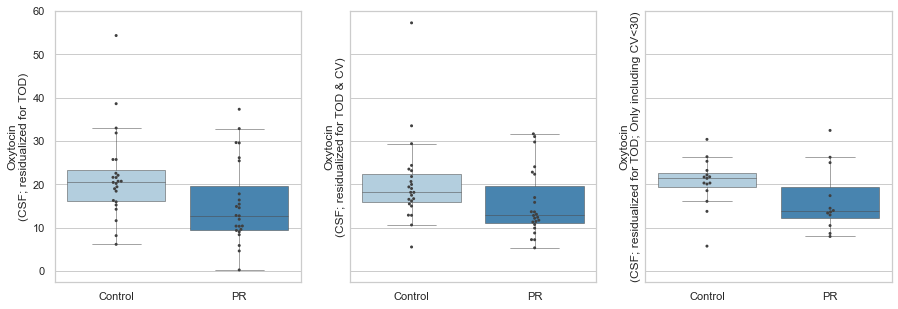

In [11]:
###
#Oxy by Group


sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

# f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5), sharey=True)
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5), sharey=True)

f = sns.boxplot(x='New_group', y='Oxy_CSF_Mean_reps_resid', data=nomom, palette="Blues", ax=ax1, linewidth="0.5",fliersize="0.1")
f = sns.swarmplot(x="New_group", y="Oxy_CSF_Mean_reps_resid", data=nomom, size=3, color=".25", ax=ax1)
f = sns.boxplot(x='New_group', y='Oxy_CSF_Mean_reps_resid_CV', data=nomom, palette="Blues", ax=ax2, linewidth="0.5",fliersize="0.1")
f = sns.swarmplot(x="New_group", y="Oxy_CSF_Mean_reps_resid_CV", data=nomom, size=3, color=".25", ax=ax2)
f = sns.boxplot(x='New_group', y='Oxy_CSF_Mean_reps_cv30_resid', data=nomom, palette="Blues", ax=ax3, linewidth="0.5",fliersize="0.1")
f = sns.swarmplot(x="New_group", y="Oxy_CSF_Mean_reps_cv30_resid", data=nomom, size=3, color=".25", ax=ax3)

#f.suptitle('Nursery Reared and Control Animals Oxytocin Levels')
ax1.set_ylabel('Oxytocin\n(CSF; residualized for TOD)');
ax2.set_ylabel('Oxytocin\n(CSF; residualized for TOD & CV)');
ax3.set_ylabel('Oxytocin\n(CSF; residualized for TOD; Only including CV<30)');
ax1.set_xlabel('');
ax2.set_xlabel('');
ax3.set_xlabel('');


# # # test if oxytocin is significant
# # results = smf.rlm('Oxy_CSF_Rep1_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# # print (results)
# # results = smf.rlm('Oxy_CSF_Rep2_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# # print (results)
# results = smf.rlm('Oxy_CSF_Mean_reps_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)
# results = smf.rlm('Oxy_CSF_Mean_reps_resid ~ C(NR) + C(Male) + uPET_age_Yr_+CV', data=nomom).fit().summary()
# print (results)
# results = smf.rlm('Oxy_CSF_Mean_reps_cv30_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)



plt.savefig('../FIGS/NOMOM_boxplot_oxy_compare_cv.pdf', dpi=300, bbox_inches='tight')

In [126]:
# f, axarr = plt.subplots(1,2,figsize=(10,5), sharey=True)
# used_cols = ['Controls', 'Group', 'oxy_csf_rep1_resid','oxy_csf_rep2_resid' ]
# color_list = ['red','blue']
# for i, row in nomom[used_cols].dropna(axis=0).iterrows():
#     axarr[row['Controls']].plot( (1,2), (row['oxy_csf_rep1_resid'],row['oxy_csf_rep2_resid']),
#                                 color=color_list[row['Controls']], alpha=.3, marker='o', )
#     axarr[row['Controls']].set_xlabel(row['Group'])



# for i in range(len(axarr)):
#     axarr[i].set_xticks((1,2))
#     axarr[i].set_xticklabels(('Time 1', 'Time 2'))
#     axarr[i].set_xlim((.75,2.25))

# f.suptitle('Nursery Reared and Control Animals Oxytocin Levels')
# axarr[0].set_ylabel('Oxytocin Levels\n(resudualized for time of day)');
# # plt.tight_layout()
# plt.savefig("../FIGS/NOMOM_oxy_repeat.pdf", dpi=300, bbox_inches='tight', transparent=True)

In [127]:
# data=nomom
# #print(smf.rlm('DaysinPairwithPeerBirthtouPET ~ DaysinGroupwithPeersBirthtouPET', data=data).fit().summary())


# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# x='Oxy_CSF_Rep1_resid'
# y='Oxy_CSF_Rep2_resid'
# data=NR
# hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Rep 1")
# plt.ylabel("Rep 2")
# #plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [31]:
# f, axarr = plt.subplots(1,2,figsize=(10,5), sharey=True)
# used_cols = ['Controls', 'Group', 'Oxy_Rep1_2','Oxy_Rep2_2' ]
# color_list = ['red','blue']
# for i, row in nomom[used_cols].dropna(axis=0).iterrows():
#     axarr[row['Controls']].plot( (1,2), (row['Oxy_Rep1_2'],row['Oxy_Rep2_2']),
#                                 color=color_list[row['Controls']], alpha=.3, marker='o', )
#     axarr[row['Controls']].set_xlabel(row['Group'])



# for i in range(len(axarr)):
#     axarr[i].set_xticks((1,2))
#     axarr[i].set_xticklabels(('Time 1', 'Time 2'))
#     axarr[i].set_xlim((.75,2.25))

# f.suptitle('Nursery Reared and Control Animals Oxytocin Levels')
# axarr[0].set_ylabel('Oxytocin Levels\n(raw data)');
# # plt.tight_layout()
# plt.savefig("../FIGS/NOMOM_oxy_repeat_raw_2.pdf", dpi=300, bbox_inches='tight', transparent=True)

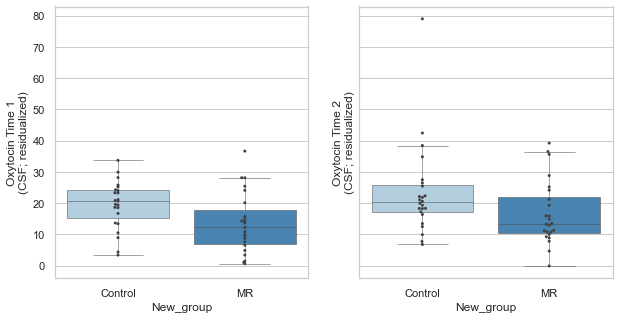

In [30]:
#Oxy by Group

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5), sharey=True)

f = sns.boxplot(x='New_group', y='oxy_csf_rep1_resid', data=nomom, palette="Blues", ax=ax1, linewidth="0.5",fliersize="0.1")
f = sns.swarmplot(x="New_group", y="oxy_csf_rep1_resid", data=nomom, size=3, color=".25", ax=ax1)
f = sns.boxplot(x='New_group', y='oxy_csf_rep2_resid', data=nomom, palette="Blues", ax=ax2, linewidth="0.5",fliersize="0.1")
f = sns.swarmplot(x="New_group", y="oxy_csf_rep2_resid", data=nomom, size=3, color=".25", ax=ax2)

#f.suptitle('Nursery Reared and Control Animals Oxytocin Levels')
ax1.set_ylabel('Oxytocin Time 1\n(CSF; residualized)');
ax2.set_ylabel('Oxytocin Time 2\n(CSF; residualized)');



plt.savefig('../FIGS/NOMOM_boxplot_oxy_repeat_2.pdf', dpi=300, bbox_inches='tight')

In [43]:
#OXYTOCIN Alternate tests
#LATEST



results = smf.rlm('Oxy_CSF_Rep1_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
print (results)
results = smf.rlm('Oxy_CSF_Rep2_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
print (results)
results = smf.rlm('Oxy_CSF_Mean_reps_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
print (results)
#results = smf.rlm('Oxy_CSF_Pat_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
#print (results)
results = smf.rlm('Oxy_CSF_Mean_reps_resid ~ C(NR) + C(Male) + uPET_age_Yr_+CV', data=nomom).fit().summary()
print (results)
# results = smf.rlm('Oxy_CSF_Pat_resid ~ C(NR) + C(Male) + uPET_age_Yr_+CV', data=nomom).fit().summary()
# print (results)
# results = smf.rlm('Oxy_CSF_Pat_cv30_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)
results = smf.rlm('Oxy_CSF_Mean_reps_cv30_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
print (results)
results = smf.rlm('CSF_oxytocin__resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
print (results)

# # #test if oxytocin with all CV (skip r11090 & r10081 due to tinged) is significant
# results = smf.rlm('O_CSF_res ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)
# # #plot if oxytocin by repeat is significant
# results = smf.rlm('oxy_csf_rep1_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)
# results = smf.rlm('oxy_csf_rep2_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)
# # #plot if oxytocin covary for CV is significant
# results = smf.rlm('O_CSF_res ~ C(NR) + C(Male) + uPET_age_Yr_ + CV', data=nomom).fit().summary()
# print (results)
# # #plot if oxytocin with CV<30 is significant
# results = smf.rlm('Oxy_CSF_Mean_reps_cv30_resid ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary()
# print (results)



                    Robust linear Model Regression Results                    
Dep. Variable:     Oxy_CSF_Rep1_resid   No. Observations:                   46
Model:                            RLM   Df Residuals:                       42
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 26 Jul 2021                                         
Time:                        18:01:20                                         
No. Iterations:                    15                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.6891      7.474      2.501   

In [42]:
#test data
#print(nomom.filter(regex="moof").columns)

# DaysinPairwithPeerBirthtouPET
# X_Days_in_Pair_with_Peer
# selected_columns_y = ['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_', 'Dam_s_Age_yrs_at_Subject_s_DOB', 
#                         'VV_Aall_hip_trans', 'VV_NECall_hip_trans', 
#                         'VV_STall_hip_trans', 'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans', 
#                         'LOST_Aall_hip_trans', 'LOST_NECall_hip_trans', 'LOST_STall_hip_trans', 'IN_Aall_hip_trans', 
#                         'IN_NECall_hip_trans', 'IN_STall_hip_trans', 'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 
#                         'FF_STall_hip_trans', 'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans', 
#                         'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
#                         'EO_STall_hip_trans', 'EH_NECall_hip_trans', 'EH_STall_hip_trans', 'FD_Aall_hip_trans', 
#                         'FD_NECall_hip_trans', 'FD_STall_hip_trans', 'VV_NECall_pet_trans', 'LO_NECall_pet_trans', 
#                         'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
#                         'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
#                         'O_NEC_res', 'C_HIP_res', 'C_Blood_res', 'O_Blood_res', 'O_CSF_res', 'CRF_CSF_res', 
#                         'CC_fa', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacPos_1_dlpfc',
#                         'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa', 'CC_ad', 'CING_av_ad', 
#                         'IC_av_ad', 'IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 'CC_tr', 'CING_av_tr', 'IC_av_tr', 
#                         'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr', 'CC_rd', 'CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 
#                         'STRIA_av_rd', 'UNC_av_rd', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
#                         'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
#                         'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
#                         'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
#                         'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

# print (smf.rlm('FF_NECall_pet_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print (smf.rlm('FF_NECall_hip_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())
# print (smf.rlm('FF_Aall_hip_trans ~ C(NR) + C(Male) + uPET_age_Yr_', data=nomom).fit().summary())

data=NR
print(str("%.3f" % round((data['DaysinPairwithPeerBirthtouPET2'].corr(data['DaysinGroupBirthtouPET2'])),3)))
print (smf.rlm('DaysinPairwithPeerBirthtouPET2 ~ DaysinGroupBirthtouPET2+AgeAtScanC+Male', data=NR).fit().summary())

# print(str("%.3f" % round((data['FF_NECall_pet_trans'].corr(data['SD_NECall_pet_trans'])),3)))
# print(str("%.3f" % round((data['FF_NECall_hip_trans'].corr(data['SD_NECall_hip_trans'])),3)))
# print(str("%.3f" % round((data['FF_Aall_hip_trans'].corr(data['SD_Aall_hip_trans'])),3)))
# print(str("%.3f" % round((data['FF_STall_hip_trans'].corr(data['SD_STall_hip_trans'])),3)))
# print (smf.rlm('FF_NECall_pet_trans ~ SD_NECall_pet_trans+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('FF_NECall_hip_trans ~ SD_NECall_hip_trans+AgeAtScanC+Male', data=NR).fit().summary())


#print (smf.rlm('X_Days_in_Pair_with_Peer ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())

# print (smf.rlm('DayswithMomBirthtouPET ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('DaysSingleBirthtouPET ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('Day_Left_Nursery ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('DaysinPairwithPeerBirthtouPET ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('DaysinGroupwithPeersBirthtouPET ~ O_CSF_res+AgeAtScanC+Male', data=NR).fit().summary())




-0.567
                          Robust linear Model Regression Results                          
Dep. Variable:     DaysinPairwithPeerBirthtouPET2   No. Observations:                   25
Model:                                        RLM   Df Residuals:                       21
Method:                                      IRLS   Df Model:                            3
Norm:                                      HuberT                                         
Scale Est.:                                   mad                                         
Cov Type:                                      H1                                         
Date:                            Wed, 29 Jan 2020                                         
Time:                                    10:39:43                                         
No. Iterations:                                10                                         
                              coef    std err          z      P>|z|      [0.025    

In [128]:
# #explore
# #PAIR
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# # x='DaysSingleBirthtouPET2'
# # y='SD_NECall_pet_trans'
# # data=NR
# # hue='Group'
# # print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # #data=Con
# # #print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# # data=NR
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # plt.ylabel("SD")
# # plt.xlabel("Days Single")
# # #plt.savefig('../FIGS/NOMOM_scatter_Pair_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)


# x='DaysinPairwithPeerBirthtouPET2'
# y='O_CSF_res'
# data=NR
# hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=Con
# #print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Days in Pair with Peers (birth to PET)")
# #plt.savefig('../FIGS/NOMOM_scatter_Pair_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)


# x='DaysinGroupBirthtouPET2'
# #x='O_CSF_res'
# data=NR
# hue='Group'
# print("NR:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=Con
# #print("Con:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=NR
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Days in Group (birth to PET)")
# #plt.savefig('../FIGS/NOMOM_scatter_Pair_Oxy_TillPET.pdf', dpi=300, bbox_inches='tight', transparent=True)



In [129]:
# #explore
# #SINGLE (NOT FIXED)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# y='X_Days_Single'
# x='O_CSF_res'
# data=NR
# hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Oxytocin (CSF)")
# plt.ylabel("Days in Group with Peers (birth to PET)")
# plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)


# y='DaysSingleBirthtouPET'
# #x='O_CSF_res'
# data=NR
# hue='Group'
# print("NR:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Oxytocin (CSF)")
# plt.ylabel("Days single (birth to PET)")
# plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillPET.pdf', dpi=300, bbox_inches='tight', transparent=True)




In [130]:
# #Explore
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# sns.set_style("whitegrid")


# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# f = sns.boxplot(x='NR', y='UNC_av_fa', data=nomom, palette="Blues", ax=ax1, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="NR", y="UNC_av_fa", data=nomom, color=".25", alpha="0.9", ax=ax1)
# #plt.savefig('../FIGS/NOMOM_boxplot_amygVolume.pdf', dpi=300, bbox_inches='tight')

In [35]:
#test data
print(nomom.filter(regex="moof").columns)
print (smf.rlm('O_CSF_res ~ X_housing_conditions+AgeAtScanC+Male', data=NR).fit().summary())

Index(['zero_3moofNewUniqueAdultCagemates', 'zero_3moofNewUniquePeerCagemates',
       'three_6moofNewUniqueAdultCagemates',
       'three_6moofNewUniquePeerCagemates', 'six_9moofNewUniqueAdultCagemates',
       'six_9moofNewUniquePeerCagemates', 'nine_12moofNewUniqueAdultCagemates',
       'nine_12moofNewUniquePeerCagemates', 'zero_3moofRoomChanges',
       'zero_3moofCageChanges', 'three_6moofRoomChanges',
       'three_6moofCageChanges', 'six_9moofRoomChanges',
       'six_9moofCageChanges', 'nine_12moofRoomChanges',
       'nine_12moofCageChanges'],
      dtype='object')
                    Robust linear Model Regression Results                    
Dep. Variable:              O_CSF_res   No. Observations:                   24
Model:                            RLM   Df Residuals:                       20
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:            

In [52]:
#Early_life - Birth to 1
#Explore correlations
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['Dam_s_Age_yrs_at_Subject_s_DOB', 'X_Days_Attempted_Reunite_with_Mom', 
                      'X_Days_Attempted_Unite_with_AM', 'X_days_Incubator', 
       'X_days_Nursery', 'X_Days_Single', 'X_Days_in_Pair_with_Peer',
       'X_Days_in_Group', 'X_Days_in_Group_with_Peers',
       'X_Days_in_Group_with_Adults_Peers', 
       'X_Days_with_Peers', 'X_Days_with_Adults', 'X_housing_conditions','TotalUniqueAdultCagematesBirthtouPET',
                     'TotalUniquePeerCagematesBirthtouPET','TotalUniqueCagematesBirthtouPET','TotalofRoomChangesBirthtoPET','TotalofCageChangesBirthtoPET',
                      'zero_6moofNewUniqueAdultCagemates','zero_6moofNewUniquePeerCagemates','six_12moofNewUniqueAdultCagemates','six_12moofNewUniquePeerCagemates','twelve_PETofNewUniqueAdultCagemates','twelve_PETofNewUniquePeerCagemates',
                      'zero_6moofRoomChanges','zero_6moofCageChanges','six_12moofRoomChanges','six_12moofCageChanges','twelve_PETofRoomChanges','twelve_PETofCageChanges']

selected_columns_x = ['O_CSF_res']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3))],
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_NR_Oxy.csv')
print(results_df)

           x                                     y            Mean    Corr  \
0  O_CSF_res        Dam_s_Age_yrs_at_Subject_s_DOB     8.42 (3.36)   0.208   
0  O_CSF_res     X_Days_Attempted_Reunite_with_Mom     2.44 (1.69)   0.398   
0  O_CSF_res        X_Days_Attempted_Unite_with_AM     1.24 (1.69)  -0.111   
0  O_CSF_res                      X_days_Incubator   25.20 (10.76)  -0.173   
0  O_CSF_res                        X_days_Nursery   79.36 (24.56)  -0.103   
0  O_CSF_res                         X_Days_Single   22.66 (12.49)  -0.070   
0  O_CSF_res              X_Days_in_Pair_with_Peer  109.98 (94.04)   0.352   
0  O_CSF_res                       X_Days_in_Group  230.17 (89.46)  -0.355   
0  O_CSF_res            X_Days_in_Group_with_Peers  156.00 (84.47)  -0.499   
0  O_CSF_res     X_Days_in_Group_with_Adults_Peers   74.17 (56.97)   0.190   
0  O_CSF_res                     X_Days_with_Peers  265.98 (59.61)  -0.161   
0  O_CSF_res                    X_Days_with_Adults   74.17 (56.9

In [17]:
#Early_life - Birth to PET
#Explore correlations with Oxytocin
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['DayswithMomaloneoringroupBirthtouPET2', 'DaysSingleBirthtouPET2', 'DaysinIncubatorsinglepairorgroup2', 'DaysinPairwithPeerBirthtouPET2', 'DaysinGroupBirthtouPET2', 'DaysinGroupwithPeersBirthtouPET2', 'DaysinGroupwithPeersAdultsBirthtouPET2', 'TotalofDaysBirthtouPET2', 'DayswithAdoptedMomaloneoringroupBirthtouPET2']

#selected_columns_x = ['O_CSF_res']
selected_columns_x = ['SD_NECall_pet_trans']

for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3))],
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_NR_Oxy_2020.csv')
print(results_df)

                     x                                             y  \
0  SD_NECall_pet_trans         DayswithMomaloneoringroupBirthtouPET2   
0  SD_NECall_pet_trans                        DaysSingleBirthtouPET2   
0  SD_NECall_pet_trans             DaysinIncubatorsinglepairorgroup2   
0  SD_NECall_pet_trans                DaysinPairwithPeerBirthtouPET2   
0  SD_NECall_pet_trans                       DaysinGroupBirthtouPET2   
0  SD_NECall_pet_trans              DaysinGroupwithPeersBirthtouPET2   
0  SD_NECall_pet_trans        DaysinGroupwithPeersAdultsBirthtouPET2   
0  SD_NECall_pet_trans                       TotalofDaysBirthtouPET2   
0  SD_NECall_pet_trans  DayswithAdoptedMomaloneoringroupBirthtouPET2   

              Mean    Corr p-value  
0      2.11 (9.79)  -0.183   0.523  
0      2.20 (6.35)  -0.314   0.035  
0     23.26 (9.04)   0.291   0.281  
0  296.07 (164.97)   0.190   0.440  
0  340.26 (141.89)  -0.053   0.503  
0  215.76 (145.13)  -0.004   0.965  
0  124.51 (104.43)  

In [42]:
# #correlation matrix baseline
# #Birth to pet
# #NR
# data=NR
# selected_nomom = data[['O_CSF_res','Dam_s_Age_yrs_at_Subject_s_DOB', 
#                       'DayswithMomBirthtouPET','DayswithAdoptedMomaloneoringroupBirthtouPET','DaysSingleBirthtouPET',
#                       'DaysinPairwithPeerBirthtouPET','DaysinGroupwithPeersBirthtouPET',
#                       'TotalofDaysBirthtouPET','X_housing_conditions_till_PET','TotalUniqueAdultCagematesBirthtouPET',
#                      'TotalUniquePeerCagematesBirthtouPET','TotalUniqueCagematesBirthtouPET','TotalofRoomChangesBirthtoPET',
#                      'TotalofCageChangesBirthtoPET','zero_3moofNewUniqueAdultCagemates', 'zero_3moofNewUniquePeerCagemates',
#        'three_6moofNewUniqueAdultCagemates',
#        'three_6moofNewUniquePeerCagemates', 'six_9moofNewUniqueAdultCagemates',
#        'six_9moofNewUniquePeerCagemates', 'nine_12moofNewUniqueAdultCagemates',
#        'nine_12moofNewUniquePeerCagemates', 'zero_3moofRoomChanges',
#        'zero_3moofCageChanges', 'three_6moofRoomChanges',
#        'three_6moofCageChanges', 'six_9moofRoomChanges',
#        'six_9moofCageChanges', 'nine_12moofRoomChanges',
#        'nine_12moofCageChanges']]

# heat = plt.figure(figsize=(10, 10))
# corr = selected_nomom.corr()



# #Make correlation matrix
# ax = plt.subplot(1, 1, 1)
# sns.set_context("paper")
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax, annot=True, robust=False, cbar=True)
# heat.savefig('../FIGS/nomom_corr_matrix_early_life.pdf', dpi=300, bbox_inches='tight', transparent=True)








In [53]:
#Till PET
#Explore correlations
#Controls only
#Robust linear regression

results_list = []
data=Con
selected_columns_y = ['Dam_s_Age_yrs_at_Subject_s_DOB','WeanAgedays', 
                      'DayswithMomBirthtouPET','DayswithAdoptedMomaloneoringroupBirthtouPET','DaysSingleBirthtouPET',
                      'DaysinPairwithPeerBirthtouPET','DaysinGroupwithPeersBirthtouPET',
                      'DayswithMominGroupBirthtouPET', 'DayswithMominGroupwithAdultsBirthtouPET','DayswithMominGroupwithAdultsPeerBirthtouPET',
                      'TotalofDaysBirthtouPET','X_housing_conditions_till_PET','TotalUniqueAdultCagematesBirthtouPET',
                     'TotalUniquePeerCagematesBirthtouPET','TotalUniqueCagematesBirthtouPET','TotalofRoomChangesBirthtoPET','TotalofCageChangesBirthtoPET',
                     'zero_6moofNewUniqueAdultCagemates','zero_6moofNewUniquePeerCagemates','six_12moofNewUniqueAdultCagemates','six_12moofNewUniquePeerCagemates','twelve_PETofNewUniqueAdultCagemates','twelve_PETofNewUniquePeerCagemates',
                      'zero_6moofRoomChanges','zero_6moofCageChanges','six_12moofRoomChanges','six_12moofCageChanges','twelve_PETofRoomChanges','twelve_PETofCageChanges']

selected_columns_x = ['O_CSF_res']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3))],
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_Con_Oxy2.csv')
print(results_df)

           x                                            y             Mean  \
0  O_CSF_res               Dam_s_Age_yrs_at_Subject_s_DOB     10.46 (3.62)   
0  O_CSF_res                                  WeanAgedays   376.00 (15.35)   
0  O_CSF_res                       DayswithMomBirthtouPET  107.42 (137.43)   
0  O_CSF_res  DayswithAdoptedMomaloneoringroupBirthtouPET      0.00 (0.00)   
0  O_CSF_res                        DaysSingleBirthtouPET      0.40 (0.80)   
0  O_CSF_res                DaysinPairwithPeerBirthtouPET  247.58 (127.93)   
0  O_CSF_res              DaysinGroupwithPeersBirthtouPET    20.13 (45.16)   
0  O_CSF_res                DayswithMominGroupBirthtouPET  268.92 (140.31)   
0  O_CSF_res      DayswithMominGroupwithAdultsBirthtouPET   83.32 (107.54)   
0  O_CSF_res  DayswithMominGroupwithAdultsPeerBirthtouPET  185.60 (169.54)   
0  O_CSF_res                       TotalofDaysBirthtouPET  913.37 (183.46)   
0  O_CSF_res                X_housing_conditions_till_PET      3

In [88]:
#Early_life
#Explore correlations
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['Dam_s_Age_yrs_at_Subject_s_DOB','WeanAgedays', 
                      'DayswithMomBirthtouPET','DayswithAdoptedMomaloneoringroupBirthtouPET','DaysSingleBirthtouPET',
                      'DaysinPairwithPeerBirthtouPET','DaysinGroupBirthtoPet','DaysinGroupwithPeersBirthtouPET',
                      'DayswithMominGroupBirthtouPET', 'DayswithMominGroupwithAdultsBirthtouPET','DayswithMominGroupwithAdultsPeerBirthtouPET',
                      'TotalofDaysBirthtouPET','X_housing_conditions_till_PET']

selected_columns_x = ['O_CSF_res']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3))],
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_NR_Oxy2.csv')
print(results_df)

           x                                            y             Mean  \
0  O_CSF_res               Dam_s_Age_yrs_at_Subject_s_DOB      8.42 (3.36)   
0  O_CSF_res                                  WeanAgedays      2.11 (9.79)   
0  O_CSF_res                       DayswithMomBirthtouPET      2.11 (9.79)   
0  O_CSF_res  DayswithAdoptedMomaloneoringroupBirthtouPET      0.02 (0.04)   
0  O_CSF_res                        DaysSingleBirthtouPET    22.88 (12.55)   
0  O_CSF_res                DaysinPairwithPeerBirthtouPET  297.90 (165.21)   
0  O_CSF_res                        DaysinGroupBirthtoPet  341.01 (142.10)   
0  O_CSF_res              DaysinGroupwithPeersBirthtouPET  170.34 (101.79)   
0  O_CSF_res                DayswithMominGroupBirthtouPET      0.00 (0.00)   
0  O_CSF_res      DayswithMominGroupwithAdultsBirthtouPET      0.00 (0.00)   
0  O_CSF_res  DayswithMominGroupwithAdultsPeerBirthtouPET      0.00 (0.00)   
0  O_CSF_res                       TotalofDaysBirthtouPET  663.9

In [115]:
#Early_life
#Difference scores
#NR only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ['X_Days_Pair_with_Peer_PET_Year2','X_Days_Group_PET_Year2']

selected_columns_x = ['O_CSF_res']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", 
                                               str("%.3f" % round((data[x].corr(data[y])),3)), 
                                               str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3))],
                                             index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_NR_Oxy3.csv')
print(results_df)

           x                                y             Mean    Corr p-value
0  O_CSF_res  X_Days_Pair_with_Peer_PET_Year2  187.92 (118.48)   0.185   0.167
0  O_CSF_res           X_Days_Group_PET_Year2   110.84 (86.83)  -0.309   0.214


In [133]:
#print (smf.rlm('O_CSF_res ~ X_Days_Group_PET_Year2+AgeAtScanC+Male', data=NR).fit().summary())
#print (smf.rlm('O_CSF_res ~ X_Days_in_Group+AgeAtScanC+Male', data=NR).fit().summary())
#print (smf.rlm('O_CSF_res ~ DaysinGroupBirthtoPet+AgeAtScanC+Male', data=NR).fit().summary())
print (smf.rlm('O_CSF_res ~ X_Days_in_Pair_with_Peer+X_Days_in_Group+AgeAtScanC+Male', data=NR).fit().summary())

# print (smf.rlm('O_CSF_res ~ X_Days_Pair_with_Peer_PET_Year2+X_Days_in_Pair_with_Peer+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('O_CSF_res ~ X_Days_Group_PET_Year2+X_Days_in_Group+AgeAtScanC+Male', data=NR).fit().summary())

# print (smf.rlm('IC_av_ad ~ X_Days_Pair_with_Peer_PET_Year2+AgeAtScanC+Male', data=NR).fit().summary())
# print (smf.rlm('IC_av_ad ~ X_Days_Group_PET_Year2+AgeAtScanC+Male', data=NR).fit().summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              O_CSF_res   No. Observations:                   24
Model:                            RLM   Df Residuals:                       19
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 08 Aug 2019                                         
Time:                        13:42:37                                         
No. Iterations:                    13                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [131]:
# #explore

# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# x='six_9moofCageChanges'
# y='O_CSF_res'
# data=NR
# hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=Con
# #print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Number of Cage Changes (6-9 Months)")
# plt.savefig('../FIGS/NOMOM_scatter_NR_6-9CageChange_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)

# x='six_9moofRoomChanges'
# y='O_CSF_res'
# data=NR
# hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=Con
# #print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Number of Room Changes (6-9 Months)")
# plt.savefig('../FIGS/NOMOM_scatter_NR_6-9RoomChange_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)


# x='three_6moofNewUniquePeerCagemates'
# #x='O_CSF_res'
# #data=NR
# #hue='Group'
# #print("NR:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Unique Peer Cage Mates (3-6 Months)")
# plt.savefig('../FIGS/NOMOM_scatter_Con_Peer_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)


# x='zero_3moofRoomChanges'
# #x='O_CSF_res'
# #data=NR
# #hue='Group'
# #print("NR:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Number of Room Changes (0-3 Months)")
# plt.savefig('../FIGS/NOMOM_scatter_Con_0-3RoomChange_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)

# x='TotalofCageChangesBirthtoPET'
# #x='O_CSF_res'
# #data=NR
# #hue='Group'
# #print("NR:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con:",x,y,"r =",str("%.3f" % round((data[x].corr(data[y]))**2,3)),"p =", str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# #data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Oxytocin (CSF)")
# plt.xlabel("Number of Cage Changes (Birth to PET)")
# plt.savefig('../FIGS/NOMOM_scatter_Con_0-PETCageChange_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)





In [132]:
# data=NR
# print(smf.rlm('DaysinPairwithPeerBirthtouPET ~ DaysinGroupwithPeersBirthtouPET', data=data).fit().summary())


# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")

# y='DaysinPairwithPeerBirthtouPET'
# x='DaysinGroupwithPeersBirthtouPET'
# data=NR
# #hue='Group'
# print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=Con
# print("Con",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))
# data=nomom
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Group")
# plt.ylabel("Pair")
# #plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)



In [138]:
data=NR
print(smf.rlm('VV_NECall_pet_trans ~ X_Days_in_Group+AgeAtScanC+SexC', data=data).fit().summary())



                     Robust linear Model Regression Results                    
Dep. Variable:     VV_NECall_pet_trans   No. Observations:                   25
Model:                             RLM   Df Residuals:                       21
Method:                           IRLS   Df Model:                            3
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Wed, 14 Aug 2019                                         
Time:                         10:26:07                                         
No. Iterations:                     39                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4380      

In [151]:
#Early environment correlate to behavior
#NR only
#Robust linear regression

results_list = []
data=Con
selected_columns_y = ['Male', 'Wt_kg_at_Birth', 'uPET_wt_kg_', 'uPET_age_Yr_', 'Dam_s_Age_yrs_at_Subject_s_DOB', 
                        'VV_Aall_hip_trans', 'VV_NECall_hip_trans', 
                        'VV_STall_hip_trans', 'LO_Aall_hip_trans', 'LO_NECall_hip_trans', 'LO_STall_hip_trans', 
                        'LOST_Aall_hip_trans', 'LOST_NECall_hip_trans', 'LOST_STall_hip_trans', 'IN_Aall_hip_trans', 
                        'IN_NECall_hip_trans', 'IN_STall_hip_trans', 'FF_Aall_hip_trans', 'FF_NECall_hip_trans', 
                        'FF_STall_hip_trans', 'EN_Aall_hip_trans', 'EN_NECall_hip_trans', 'EN_STall_hip_trans', 
                        'SD_Aall_hip_trans', 'SD_NECall_hip_trans', 'SD_STall_hip_trans', 'EO_NECall_hip_trans', 
                        'EO_STall_hip_trans', 'EH_NECall_hip_trans', 'EH_STall_hip_trans', 'FD_Aall_hip_trans', 
                        'FD_NECall_hip_trans', 'FD_STall_hip_trans', 'VV_NECall_pet_trans', 'LO_NECall_pet_trans', 
                        'LOST_NECall_pet_trans', 'IN_NECall_pet_trans', 'FF_NECall_pet_trans', 'EN_NECall_pet_trans', 
                        'SD_NECall_pet_trans', 'EO_NECall_pet_trans', 'EH_NECall_pet_trans', 'AT_NEW', 'C_NEC_res', 
                        'O_NEC_res', 'C_HIP_res', 'C_Blood_res', 'O_Blood_res', 'O_CSF_res', 'CRF_CSF_res', 
                        'CC_fa', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacPos_1_dlpfc',
                        'CING_av_fa', 'IC_av_fa', 'IFO_av_fa', 'STRIA_av_fa', 'UNC_av_fa', 'CC_ad', 'CING_av_ad', 
                        'IC_av_ad', 'IFO_av_ad', 'STRIA_av_ad', 'UNC_av_ad', 'CC_tr', 'CING_av_tr', 'IC_av_tr', 
                        'IFO_av_tr', 'STRIA_av_tr', 'UNC_av_tr', 'CC_rd', 'CING_av_rd', 'IC_av_rd', 'IFO_av_rd', 
                        'STRIA_av_rd', 'UNC_av_rd', 'DTI_AD_6_neg_AD', 'DTI_AD_7_neg_AD', 
                        'DTI_AD_8_neg_AD', 'DTI_MD_6_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_8_neg_MD', 
                        'DTI_MD_9_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_11_neg_MD', 
                        'DTI_RD_8_neg_RD', 'DTI_RD_9_neg_RD', 'rs_fMRI_postCing_8_neg_postCing', 
                        'rs_fMRI_bilateral_7_neg_bilateral', 'petPos_2_insula']

selected_columns_x = ['X_Days_in_Pair_with_Peer']
#selected_columns_x = ['X_Days_in_Group']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
#print (results_df)

In [133]:
# data=NR
# #print(smf.rlm('DaysinPairwithPeerBirthtouPET ~ DaysinGroupwithPeersBirthtouPET', data=data).fit().summary())


# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("paper")
# x='X_Days_in_Pair_with_Peer'
# #x='X_Days_in_Group'

# y='VV_NECall_hip_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)
# y='SD_NECall_hip_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)
# y='EO_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)
# y='EH_NECall_hip_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)
# y='LOST_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)
# y='CC_tr'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

# #plt.savefig('../FIGS/NOMOM_scatter_Group_Oxy.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [134]:
# data=NR



# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# x='X_Days_in_Pair_with_Peer'
# #x='X_Days_in_Group'

# y='uPET_wt_kg_'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

# #x='X_Days_in_Pair_with_Peer'
# x='X_Days_in_Group'

# y='Wt_kg_at_Birth'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)


# y='uPET_wt_kg_'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)


In [2]:
print(smf.rlm('X_Days_in_Pair_with_Peer ~ X_Days_in_Group', data=data).fit().summary())
x='X_Days_in_Group'
y='X_Days_in_Pair_with_Peer'
data=NR
print("NR",x,y,str("%.3f" % round((data[x].corr(data[y]))**2,3)), str("%.3f" % round(smf.rlm(x+'~ '+y+'+AgeAtScanC+Male', data=data).fit().pvalues[1],3)))

NameError: name 'smf' is not defined

In [135]:
# #UNC FA by Group
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# sns.set_context("poster")
# sns.set_style("whitegrid")


# f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# f = sns.boxplot(x='Group', y='IC_av_ad', data=nomom, palette="Blues", ax=ax2, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="Group", y="IC_av_ad", data=nomom, color=".25", alpha="0.9", ax=ax2)
# f = sns.boxplot(x='Group', y='IC_av_tr', data=nomom, palette="Blues", ax=ax1, linewidth="0.9",fliersize="0.1")
# f = sns.swarmplot(x="Group", y="IC_av_tr", data=nomom, color=".25", alpha="0.9", ax=ax1)
# #plt.savefig('../FIGS/NOMOM_boxplot_amygVolume.pdf', dpi=300, bbox_inches='tight')

In [70]:
#Try to run Hierarchical cluster with all NOMOM data

def zscore(x):
    return (x - x.mean())/x.std()

# points = nomom[["Male","Wt_kg_at_Birth","uPET_wt_kg_","uPET_age_Yr_","c_section","Dam_s_Age_yrs_at_Subject_s_DOB","VV_Aall_hip_trans","VV_NECall_hip_trans","VV_STall_hip_trans","LO_Aall_hip_trans","LO_NECall_hip_trans","LO_STall_hip_trans","LOST_Aall_hip_trans","LOST_NECall_hip_trans","LOST_STall_hip_trans","IN_Aall_hip_trans","IN_NECall_hip_trans","IN_STall_hip_trans","FF_Aall_hip_trans","FF_NECall_hip_trans","FF_STall_hip_trans","EN_Aall_hip_trans","EN_NECall_hip_trans","EN_STall_hip_trans","SD_Aall_hip_trans","SD_NECall_hip_trans","SD_STall_hip_trans","EO_NECall_hip_trans","EO_STall_hip_trans","EH_NECall_hip_trans","EH_STall_hip_trans","FD_Aall_hip_trans","FD_NECall_hip_trans","FD_STall_hip_trans","VV_NECall_pet_trans","LO_NECall_pet_trans","LOST_NECall_pet_trans","IN_NECall_pet_trans","FF_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","EO_NECall_pet_trans","EH_NECall_pet_trans","AT_NEW","C_NEC_res","O_NEC_res","C_HIP_res","C_Blood_res","O_Blood_res","O_CSF_res","CRF_CSF_res","CC_fa","jacPos_2_amygWhiteL","jacPos_3_amygWhiteR","jacPos_1_dlpfc","CING_av_fa","IC_av_fa","IFO_av_fa","STRIA_av_fa","UNC_av_fa","CC_ad","CING_av_ad","IC_av_ad","IFO_av_ad","STRIA_av_ad","UNC_av_ad","CC_tr","CING_av_tr","IC_av_tr","IFO_av_tr","STRIA_av_tr","UNC_av_tr","CC_rd","CING_av_rd","IC_av_rd","IFO_av_rd","STRIA_av_rd","UNC_av_rd","DTI_AD_6_neg_AD","DTI_AD_7_neg_AD","DTI_AD_8_neg_AD","DTI_MD_6_neg_MD","DTI_MD_7_neg_MD","DTI_MD_8_neg_MD","DTI_MD_9_neg_MD","DTI_MD_10_neg_MD","DTI_MD_11_neg_MD","DTI_RD_8_neg_RD","DTI_RD_9_neg_RD","rs_fMRI_postCing_8_neg_postCing","rs_fMRI_bilateral_7_neg_bilateral","petPos_2_insula"]].dropna()
# points = nomom[["O_NEC_res","C_HIP_res","Wt_kg_at_Birth","uPET_wt_kg_","uPET_age_Yr_","c_section","rs_fMRI_bilateral_7_neg_bilateral","petPos_2_insula"]].dropna()
# points = nomom[["X_Days_Mom_Alone","X_Days_with_Mom_in_Group_with_Adults","X_Days_with_Mom_in_Group_with_Adults_Peer","X_Days_with_Mom","X_Days_with_AM","X_Days_Single","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_in_Group_with_Peers","X_Days_in_Group_with_Adults_Peers","X_Days_Alone","X_Days_with_Peers","X_Days_with_Adults","X_housing_conditions","Male","Wt_kg_at_Birth","uPET_wt_kg_","uPET_age_Yr_","c_section","Dam_s_Age_yrs_at_Subject_s_DOB","VV_Aall_hip_trans","VV_NECall_hip_trans","VV_STall_hip_trans","LO_Aall_hip_trans","LO_NECall_hip_trans","LO_STall_hip_trans","LOST_Aall_hip_trans","LOST_NECall_hip_trans","LOST_STall_hip_trans","IN_Aall_hip_trans","IN_NECall_hip_trans","IN_STall_hip_trans","FF_Aall_hip_trans","FF_NECall_hip_trans","FF_STall_hip_trans","EN_Aall_hip_trans","EN_NECall_hip_trans","EN_STall_hip_trans","SD_Aall_hip_trans","SD_NECall_hip_trans","SD_STall_hip_trans","EO_NECall_hip_trans","EO_STall_hip_trans","EH_NECall_hip_trans","EH_STall_hip_trans","FD_Aall_hip_trans","FD_NECall_hip_trans","FD_STall_hip_trans","VV_NECall_pet_trans","LO_NECall_pet_trans","LOST_NECall_pet_trans","IN_NECall_pet_trans","FF_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","EO_NECall_pet_trans","EH_NECall_pet_trans","AT_NEW","C_NEC_res","O_NEC_res","C_HIP_res","C_Blood_res","O_Blood_res","O_CSF_res","CRF_CSF_res","CC_fa","jacPos_2_amygWhiteL","jacPos_3_amygWhiteR","jacPos_1_dlpfc","CING_av_fa","IC_av_fa","IFO_av_fa","STRIA_av_fa","UNC_av_fa","CC_ad","CING_av_ad","IC_av_ad","IFO_av_ad","STRIA_av_ad","UNC_av_ad","CC_tr","CING_av_tr","IC_av_tr","IFO_av_tr","STRIA_av_tr","UNC_av_tr","CC_rd","CING_av_rd","IC_av_rd","IFO_av_rd","STRIA_av_rd","UNC_av_rd","DTI_AD_6_neg_AD","DTI_AD_7_neg_AD","DTI_AD_8_neg_AD","DTI_MD_6_neg_MD","DTI_MD_7_neg_MD","DTI_MD_8_neg_MD","DTI_MD_9_neg_MD","DTI_MD_10_neg_MD","DTI_MD_11_neg_MD","DTI_RD_8_neg_RD","DTI_RD_9_neg_RD","rs_fMRI_postCing_8_neg_postCing","rs_fMRI_bilateral_7_neg_bilateral","petPos_2_insula"]].dropna()
# points = nomom[["X_Days_Mom_Alone","X_Days_with_Mom_in_Group_with_Adults","X_Days_with_Mom_in_Group_with_Adults_Peer","X_Days_with_Mom","X_Days_with_AM","X_Days_Single","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_in_Group_with_Peers","X_Days_in_Group_with_Adults_Peers","X_Days_Alone","X_Days_with_Peers","X_Days_with_Adults","X_housing_conditions","Male","Wt_kg_at_Birth","uPET_wt_kg_","uPET_age_Yr_","c_section","Dam_s_Age_yrs_at_Subject_s_DOB","VV_NECall_hip_trans","LO_NECall_hip_trans","LOST_NECall_hip_trans","FF_NECall_hip_trans","SD_NECall_hip_trans","EO_NECall_hip_trans","EH_NECall_hip_trans","EH_STall_hip_trans","VV_NECall_pet_trans","LOST_NECall_pet_trans","FF_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","EO_NECall_pet_trans","EH_NECall_pet_trans","AT_NEW","C_NEC_res","O_NEC_res","C_HIP_res","C_Blood_res","O_Blood_res","O_CSF_res","CRF_CSF_res","CC_fa","CING_av_fa","IC_av_fa","IFO_av_fa","STRIA_av_fa","UNC_av_fa","CC_tr","CING_av_tr","IC_av_tr","IFO_av_tr","STRIA_av_tr","UNC_av_tr"]].dropna()
# points = nomom[["AgeAtScanC","SexC","GroupC","Wt_kg_at_Birth","c_section","Dam_s_Age_yrs_at_Subject_s_DOB", "X_Days_with_Mom","X_Days_Single","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_Alone","X_housing_conditions_till_PET","TotalUniqueCagematesBirthtouPET","TotalofRoomChangesBirthtoPET","TotalofCageChangesBirthtoPET","VV_NECall_pet_trans","FF_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","EO_NECall_pet_trans","C_NEC_res","O_CSF_res", "AT","IC_av_ad","UNC_av_fa","jacPos_2_amygWhiteL","jacPos_3_amygWhiteR"]].dropna()
# points = Con[["AgeAtScanC","SexC","Wt_kg_at_Birth","c_section","Dam_s_Age_yrs_at_Subject_s_DOB","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_Alone","X_housing_conditions_till_PET","TotalUniqueCagematesBirthtouPET","TotalofRoomChangesBirthtoPET","TotalofCageChangesBirthtoPET","VV_NECall_pet_trans","FF_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","EO_NECall_pet_trans","C_NEC_res","O_NEC_res","C_HIP_res","C_Blood_res","O_Blood_res","O_CSF_res","CRF_CSF_res", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_ad","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"]].dropna()
points = Con[['Dam_s_Age_yrs_at_Subject_s_DOB', 
'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final','Total_X_Room_Changes_Birth_to_PET_final',
'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
'EO_NECall_pet_trans','EO_NECall_hip_trans',
'FF_NECall_pet_trans','FF_Aall_hip_trans',
'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
'LO_Aall_hip_trans',
#'O_CSF_res',
'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
'IC_av_ad','DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD','DTI_RD_7_neg_RD', 
'rs_fMRI_postCing_8_neg_postCing','rs_fMRI_bilateral_7_neg_bilateral','petPos_2_insula']].dropna()
points = points.apply(zscore, axis=0)

print(points.index.size)
# print(points)


25


In [136]:
# cluster_plot=sns.clustermap(points, cmap="mako", z_score = 1,figsize=(20,20))
# plt.show();
# cluster_plot.savefig('../FIGS/NOMOM_Con_clustermap.pdf', dpi=300, bbox_inches='tight')

In [18]:
#Early environment correlate to other
#Robust linear regression

results_list = []
data=nomom
selected_columns_y = ["Dam_s_Age_yrs_at_Subject_s_DOB","FF_NECall_pet_trans","EO_NECall_pet_trans","C_NEC_res","O_NEC_res","C_HIP_res","C_Blood_res","O_Blood_res","O_CSF_res","CRF_CSF_res", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"]
# "c_section","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_Alone","X_housing_conditions_till_PET","TotalUniqueCagematesBirthtouPET","TotalofRoomChangesBirthtoPET","TotalofCageChangesBirthtoPET","VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","IC_av_ad",
selected_columns_x = ['X_Days_in_Group']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                 x                               y             Mean    Corr  \
0  X_Days_in_Group  Dam_s_Age_yrs_at_Subject_s_DOB      9.44 (3.61)  -0.026   
0  X_Days_in_Group             FF_NECall_pet_trans      2.10 (1.71)  -0.036   
0  X_Days_in_Group             EO_NECall_pet_trans      3.34 (0.67)   0.062   
0  X_Days_in_Group                       C_NEC_res    67.59 (12.31)  -0.084   
0  X_Days_in_Group                       O_NEC_res  349.66 (364.39)  -0.086   
0  X_Days_in_Group                       C_HIP_res    62.30 (10.93)  -0.081   
0  X_Days_in_Group                     C_Blood_res     33.24 (9.47)   0.018   
0  X_Days_in_Group                     O_Blood_res  336.31 (358.85)   0.032   
0  X_Days_in_Group                       O_CSF_res     18.40 (9.92)   0.030   
0  X_Days_in_Group                     CRF_CSF_res    38.07 (16.30)  -0.092   
0  X_Days_in_Group                              AT      0.00 (0.73)   0.002   
0  X_Days_in_Group                           CC_ad  

In [37]:
#Early environment correlate to other
#Robust linear regression

results_list = []
data=nomom
selected_columns_y = ["SD_NECall_pet_trans","IC_av_ad","EN_NECall_pet_trans","VV_NECall_pet_trans"]
# "c_section","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_Alone","X_housing_conditions_till_PET","TotalUniqueCagematesBirthtouPET","TotalofRoomChangesBirthtoPET","TotalofCageChangesBirthtoPET","VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","IC_av_ad",
selected_columns_x = ['X_housing_conditions_till_PET']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                               x                    y         Mean    Corr  \
0  X_housing_conditions_till_PET  SD_NECall_pet_trans  1.63 (1.60)   0.418   
0  X_housing_conditions_till_PET             IC_av_ad  1.07 (0.04)   0.117   
0  X_housing_conditions_till_PET  EN_NECall_pet_trans  1.63 (1.00)   0.254   
0  X_housing_conditions_till_PET  VV_NECall_pet_trans  2.30 (3.46)  -0.033   

  p-value  
0   0.008  
0   0.255  
0   0.054  
0   0.889  


In [28]:
#Early environment correlate to other
#NR Only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ["C_NEC_res","C_HIP_res","C_Blood_res","AT"]
#"Dam_s_Age_yrs_at_Subject_s_DOB","FF_NECall_pet_trans","EO_NECall_pet_trans","O_NEC_res","O_Blood_res","O_CSF_res","CRF_CSF_res", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"
# "c_section","X_Days_in_Pair_with_Peer","X_Days_in_Group","X_Days_Alone","X_Days_in_Group","TotalUniqueCagematesBirthtouPET","TotalofRoomChangesBirthtoPET","TotalofCageChangesBirthtoPET","VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans","IC_av_ad",
selected_columns_x = ['X_housing_conditions_till_PET']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                               x            y           Mean   Corr p-value
0  X_housing_conditions_till_PET    C_NEC_res  68.05 (14.62)  0.055   0.353
0  X_housing_conditions_till_PET    C_HIP_res  62.41 (11.52)  0.078   0.371
0  X_housing_conditions_till_PET  C_Blood_res   33.65 (9.84)  0.416   0.001
0  X_housing_conditions_till_PET           AT   -0.13 (0.85)  0.158   0.307


In [31]:
#Early environment correlate to other
#NR Only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ["FF_NECall_pet_trans","CRF_CSF_res","IC_av_ad","EO_NECall_pet_trans"]
#"O_NEC_res","O_Blood_res","Dam_s_Age_yrs_at_Subject_s_DOB","O_CSF_res","c_section","X_Days_in_Pair_with_Peer","TotalofCageChangesBirthtoPET",,,"C_NEC_res","C_HIP_res","C_Blood_res","AT", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"
# ,"X_housing_conditions_till_PET","TotalofRoomChangesBirthtoPET","X_Days_Alone","X_Days_in_Group","TotalUniqueCagematesBirthtouPET",,"VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans"
selected_columns_x = ['X_Days_in_Group']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                 x                    y           Mean   Corr p-value
0  X_Days_in_Group  FF_NECall_pet_trans    1.60 (1.64)  0.222   0.030
0  X_Days_in_Group          CRF_CSF_res  38.78 (15.06)  0.234   0.142
0  X_Days_in_Group             IC_av_ad    1.08 (0.03)  0.083   0.809
0  X_Days_in_Group  EO_NECall_pet_trans    3.14 (0.64)  0.299   0.004


In [33]:
#Early environment correlate to other
#NR Only
#Robust linear regression

results_list = []
data=NR
selected_columns_y = ["FF_NECall_pet_trans","CRF_CSF_res","IC_av_ad","EO_NECall_pet_trans"]
#"O_NEC_res","O_Blood_res","Dam_s_Age_yrs_at_Subject_s_DOB","O_CSF_res","c_section","X_Days_in_Pair_with_Peer","TotalofCageChangesBirthtoPET",,,"C_NEC_res","C_HIP_res","C_Blood_res","AT", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"
# ,"X_housing_conditions_till_PET","TotalofRoomChangesBirthtoPET","X_Days_Alone","X_Days_in_Group","X_Days_in_Group",,"VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans"
selected_columns_x = ['TotalUniqueCagematesBirthtouPET']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                                 x                    y           Mean   Corr  \
0  TotalUniqueCagematesBirthtouPET  FF_NECall_pet_trans    1.60 (1.64)  0.091   
0  TotalUniqueCagematesBirthtouPET          CRF_CSF_res  38.78 (15.06)  0.062   
0  TotalUniqueCagematesBirthtouPET             IC_av_ad    1.08 (0.03)  0.070   
0  TotalUniqueCagematesBirthtouPET  EO_NECall_pet_trans    3.14 (0.64)  0.424   

  p-value  
0   0.611  
0   0.469  
0   0.682  
0   0.132  


In [16]:
#Early environment correlate to other
#Controls Only
#Robust linear regression

results_list = []
data=Con
selected_columns_y = ["VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans"]
#"O_NEC_res","O_Blood_res","Dam_s_Age_yrs_at_Subject_s_DOB","O_CSF_res","c_section","X_Days_in_Pair_with_Peer","TotalofCageChangesBirthtoPET",,,"C_NEC_res","C_HIP_res","C_Blood_res","AT", "AT","CC_ad","CC_fa","CING_av_ad","CING_av_fa","IC_av_fa","IFO_av_ad","IFO_av_fa","STRIA_av_ad","STRIA_av_fa","UNC_av_ad","UNC_av_fa"
# ,"X_Days_in_Group","TotalofRoomChangesBirthtoPET","X_Days_Alone","TotalUniqueCagematesBirthtouPET","X_Days_in_Group","FF_NECall_pet_trans","CRF_CSF_res","IC_av_ad","EO_NECall_pet_trans",
selected_columns_x = ['X_housing_conditions_till_PET']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                               x                    y         Mean    Corr  \
0  X_housing_conditions_till_PET  VV_NECall_pet_trans  1.84 (2.78)  -0.006   
0  X_housing_conditions_till_PET  EN_NECall_pet_trans  1.23 (0.81)   0.408   
0  X_housing_conditions_till_PET  SD_NECall_pet_trans  0.70 (0.86)   0.229   

  p-value  
0   0.813  
0   0.026  
0   0.531  


In [40]:
#Early environment correlate to other
#Controls Only
#Robust linear regression

results_list = []
data=Con
selected_columns_y = ["O_NEC_res","IFO_av_fa","CC_fa","IC_av_fa","CING_av_fa","UNC_av_fa","STRIA_av_fa"]
#,"O_Blood_res","Dam_s_Age_yrs_at_Subject_s_DOB","O_CSF_res","c_section","","TotalofCageChangesBirthtoPET",,,"C_NEC_res","C_HIP_res","C_Blood_res","AT", "AT","CC_ad","CING_av_ad","IFO_av_ad","STRIA_av_ad","UNC_av_ad",
# "X_housing_conditions_till_PET","X_Days_in_Group","TotalofRoomChangesBirthtoPET","X_Days_Alone","TotalUniqueCagematesBirthtouPET","X_Days_in_Group","FF_NECall_pet_trans","CRF_CSF_res","IC_av_ad","EO_NECall_pet_trans","VV_NECall_pet_trans","EN_NECall_pet_trans","SD_NECall_pet_trans"
selected_columns_x = ['X_Days_in_Pair_with_Peer']
for y in (selected_columns_y):
    for x in (selected_columns_x):
        try:
            results = smf.rlm(y+'~ '+x+'+AgeAtScanC+SexC+Wt_kg_at_Birth', data=data).fit()
            results_list.append(pd.DataFrame( [x, y,str("%.2f" % round(data[y].mean(),2))+" ("+str("%.2f" % round(data[y].std(),2))+")", str("%.3f" % round((data[x].corr(data[y])),3)), str("%.3f" % round(results.pvalues[1],3))], index=['x','y','Mean','Corr','p-value']).transpose()) 
        except:
            print('failed on col: '+y)
            results_list.append(pd.DataFrame( [1.0], index=['p-value']).transpose()) 

results_df = pd.concat(results_list)

# results_df.to_csv('NOMOM_python_corr_Pair_Con.csv')
print (results_df)

                          x            y             Mean   Corr p-value
0  X_Days_in_Pair_with_Peer    O_NEC_res  376.90 (414.71)  0.131   0.891
0  X_Days_in_Pair_with_Peer    IFO_av_fa      0.39 (0.02)  0.219   0.233
0  X_Days_in_Pair_with_Peer        CC_fa      0.43 (0.02)  0.330   0.451
0  X_Days_in_Pair_with_Peer     IC_av_fa      0.41 (0.02)  0.297   0.242
0  X_Days_in_Pair_with_Peer   CING_av_fa      0.30 (0.02)  0.230   0.425
0  X_Days_in_Pair_with_Peer    UNC_av_fa      0.27 (0.01)  0.258   0.424
0  X_Days_in_Pair_with_Peer  STRIA_av_fa      0.25 (0.01)  0.583   0.001


In [137]:
# #Plot sign correlations
# #data=Con
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")

# data=Con
# hue='Group'

# x='X_Days_in_Pair_with_Peer'
# y='STRIA_av_fa'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

# x='X_housing_conditions_till_PET'
# y='EN_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)


In [138]:
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")


# #Plot sign correlations
# hue='Group'
# data=NR
# x='X_Days_in_Group'
# y='EO_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

# x='X_Days_in_Group'
# y='FF_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

# x='X_housing_conditions_till_PET'
# y='C_Blood_res'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

In [139]:
# #Plot sign correlations
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("poster")


# hue='Group'
# data=nomom
# # x='VV_NECall_pet_trans'
# # y='IC_av_ad'
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # plt.xlabel(x)
# # plt.ylabel(y)

# # x='X_Days_in_Pair_with_Peer'
# # y='VV_NECall_pet_trans'
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # plt.xlabel(x)
# # plt.ylabel(y)

# x='X_housing_conditions_till_PET'
# y='SD_NECall_pet_trans'
# # sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)


# x='X_housing_conditions_till_PET'
# y='SD_NECall_pet_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.xlabel(x)
# plt.ylabel(y)

In [140]:
# #Plot sign correlations
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("poster")


# hue='Group'
# data=NR
# x='Total_X_Room_Changes_Birth_to_PET_final'
# y='jacPos_2_amygWhiteL'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("# of room changes (Birth to PET)")
# plt.ylabel("Amygdala volume (L)")

# hue='Group'
# data=nomom
# x='SD_STall_hip_trans'
# y='SD_Aall_hip_trans'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.xlabel("Self-directed (Stare-HIP)")
# plt.ylabel("Self-directed (Alone-HIP)")


# x='O_CSF_res'
# y='X_Days_Group_with_Peers_Birth_to_PET_final'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.xlabel("Oxytocin (CSF)")
# plt.ylabel("# of days in group with peers (Birth to PET)")

# x='IC_av_ad'
# y='DTI_RD_7_neg_RD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.xlabel("Internal Capsule (AD)")
# plt.ylabel("Internal Capsule cluster (RD)")